## Is water availablity and use related to GDP per capita

### Load the data

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format='retina'
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import folium
import seaborn as sns
from pandas_profiling import ProfileReport
import matplotlib as mpl
import scipy
import numpy as np

In [2]:
data = pd.read_csv("../data/aquastat.csv.gzip", compression="gzip")
data.head()

country        region    variable                        variable_full  \
0  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   
1  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   
2  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   
3  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   
4  Afghanistan  World | Asia  total_area  Total area of the country (1000 ha)   

  time_period  year_measured    value  
0   1958-1962         1962.0  65286.0  
1   1963-1967         1967.0  65286.0  
2   1968-1972         1972.0  65286.0  
3   1973-1977         1977.0  65286.0  
4   1978-1982         1982.0  65286.0

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143280 entries, 0 to 143279
Data columns (total 7 columns):
country          143280 non-null object
region           143280 non-null object
variable         143280 non-null object
variable_full    143280 non-null object
time_period      143280 non-null object
year_measured    96411 non-null float64
value            96411 non-null float64
dtypes: float64(2), object(5)
memory usage: 7.7+ MB


### Univariate analysis

In [4]:
data[["variable", "variable_full"]].drop_duplicates()

variable  \
0                                     total_area   
576                                  arable_land   
1152                         permanent_crop_area   
1728                             cultivated_area   
2304                          percent_cultivated   
2880                                   total_pop   
3456                                   rural_pop   
4032                                   urban_pop   
4608                                         gdp   
5184                              gdp_per_capita   
5760                                  agg_to_gdp   
6336                             human_dev_index   
6912                        gender_inequal_index   
7488                      percent_undernourished   
8064                       number_undernourished   
8640                       avg_annual_rain_depth   
9216                         avg_annual_rain_vol   
9792                     national_rainfall_index   
10368                     surface_water_produced   
10944                       groundwater_produced   
11520                surface_groundwater_overlap   
12096                                       irwr   
12672                            irwr_per_capita   
13248                           surface_entering   
13824            surface_inflow_submit_no_treaty   
14400               surface_inflow_submit_treaty   
14976               surface_inflow_secure_treaty   
15552                   total_flow_border_rivers   
16128               accounted_flow_border_rivers   
16704                             accounted_flow   
17280                 surface_to_other_countries   
17856           surface_outflow_submit_no_treaty   
18432              surface_outflow_submit_treaty   
19008              surface_outflow_secure_treaty   
19584           surface_total_external_renewable   
20160                       groundwater_entering   
20736               groundwater_accounted_inflow   
21312             groundwater_to_other_countries   
21888              groundwater_accounted_outflow   
22464             water_total_external_renewable   
23040                    total_renewable_surface   
23616                total_renewable_groundwater   
24192                overlap_surface_groundwater   
24768                            total_renewable   
25344                           dependency_ratio   
25920                 total_renewable_per_capita   
26496      exploitable_regular_renewable_surface   
27072    exploitable_irregular_renewable_surface   
27648        exploitable_total_renewable_surface   
28224  exploitable_regular_renewable_groundwater   
28800                          exploitable_total   
29376                    interannual_variability   
29952                       seasonal_variability   
30528                         total_dam_capacity   
31104                    dam_capacity_per_capita   
31680                       irrigation_potential   
32256                            flood_occurence   
32832                  total_pop_access_drinking   
33408                  rural_pop_access_drinking   
33984                  urban_pop_access_drinking   

                                           variable_full  
0                    Total area of the country (1000 ha)  
576                           Arable land area (1000 ha)  
1152                      Permanent crops area (1000 ha)  
1728   Cultivated area (arable land + permanent crops...  
2304              % of total country area cultivated (%)  
2880                       Total population (1000 inhab)  
3456                       Rural population (1000 inhab)  
4032                       Urban population (1000 inhab)  
4608          Gross Domestic Product (GDP) (current US$)  
5184                  GDP per capita (current US$/inhab)  
5760                 Agriculture, value added to GDP (%)  
6336     Human Development Index (HDI) [highest = 1] (-)  
6912   Gender Inequality Index (GII) [equality = 0; i...  
7488   Prevalence of undernourishment (3-

### How many conutries data do we have?

In [5]:
countries = data.country.unique()
data.country.nunique()

199

### How many different time periods of data we have?

In [6]:
data.time_period.nunique()

12

In [7]:
time_periods = data.time_period.unique()
time_periods

array(['1958-1962', '1963-1967', '1968-1972', '1973-1977', '1978-1982',
       '1983-1987', '1988-1992', '1993-1997', '1998-2002', '2003-2007',
       '2008-2012', '2013-2017'], dtype=object)

#### So, we have 12 time periods from 1958 to 2017 with a window of 5 years

### How to look at the data
- All countries during single time period
- A single country over time
- All countries over all time periods - typically, the entire data for a given variable
- All countries that are geograpgically related

### All countries during single time period

In [8]:
def time_slice(df, time_period):
    """
    On the given dataframe, 
        1. slice the data in the given time period.
        2. Pivot the dataframe to get all the values of the 'variable' to a column 
           and populate the cell with the data in the 'value' column
        3. Update the column name to the time_period
    """
    
    df = df[df["time_period"] == time_period]
    df = df.pivot(index="country", columns="variable", values="value")
    df.columns.name = time_period
    
    return df
    

In [9]:
time_slice(data, time_periods[0]).head()

1958-1962    accounted_flow  accounted_flow_border_rivers  agg_to_gdp  \
country                                                                 
Afghanistan           19.00                           9.0         NaN   
Albania                3.30                           0.0         NaN   
Algeria                0.39                           0.0         NaN   
Andorra                 NaN                           NaN         NaN   
Angola                 0.40                           0.0         NaN   

1958-1962    arable_land  avg_annual_rain_depth  avg_annual_rain_vol  \
country                                                                
Afghanistan       7700.0                  327.0             213.5000   
Albania            436.0                 1485.0              42.6900   
Algeria           6300.0                   89.0             212.0000   
Andorra              1.0                    NaN               0.4724   
Angola            2700.0                 1010.0            1259.0000   

1958-1962    cultivated_area  dam_capacity_per_capita  dependency_ratio  \
country                                                                   
Afghanistan           7760.0                   128.40           28.7200   
Albania                487.0                      NaN           10.9300   
Algeria               6900.0                    89.99            3.5990   
Andorra                  1.0                      NaN               NaN   
Angola                3200.0                    25.96            0.2695   

1958-1962    exploitable_irregular_renewable_surface  ...  \
country                                               ...   
Afghanistan                                      NaN  ...   
Albania                                          NaN  ...   
Algeria                                          5.0  ...   
Andorra                                          NaN  ...   
Angola                                           NaN  ...   

1958-1962    total_flow_border_rivers  total_pop  total_pop_access_drinking  \
country                                                                       
Afghanistan                      33.4    9344.00                        NaN   
Albania                           0.0    1738.00                        NaN   
Algeria                           0.0   11690.00                        NaN   
Andorra                           NaN      15.38                        NaN   
Angola                            0.0    5466.00                        NaN   

1958-1962    total_renewable  total_renewable_groundwater  \
country                                                     
Afghanistan          65.3300                       10.650   
Albania              30.2000                        6.200   
Algeria              11.6700                        1.517   
Andorra               0.3156                          NaN   
Angola              148.4000                       58.000   

1958-1962    total_renewable_per_capita  total_renewable_surface  urban_pop  \
country                                                                       
Afghanistan                      6992.0                    55.68     804.90   
Albania                         17376.0                    26.35     533.20   
Algeria                           998.3                    10.15    3934.00   
Andorra                         20520.0                      NaN       9.76   
Angola                          27150.0                   145.40     577.00   

1958-1962    urban_pop_access_drinking  water_total_external_renewable  
country                                                                 
Afghanistan                        NaN                           18.18  
Albania                            NaN                            3.30  
Algeria                            NaN                            0.42  
Andorra                            NaN                             NaN  
Angola                             NaN                 

### A single country over time

In [10]:
def country_slice(df, country):
    df = df[df.country == country]
    df = df.pivot(index="variable", columns="time_period", values="value")
    df.columns.name = country
    
    return df

In [11]:
country_slice(data, countries[0]).head()

Afghanistan                   1958-1962  1963-1967  1968-1972  1973-1977  \
variable                                                                   
accounted_flow                     19.0       19.0       19.0       19.0   
accounted_flow_border_rivers        9.0        9.0        9.0        9.0   
agg_to_gdp                          NaN        NaN        NaN        NaN   
arable_land                      7700.0     7844.0     7910.0     7910.0   
avg_annual_rain_depth             327.0      327.0      327.0      327.0   

Afghanistan                   1978-1982  1983-1987  1988-1992  1993-1997  \
variable                                                                   
accounted_flow                     19.0       19.0       19.0       19.0   
accounted_flow_border_rivers        9.0        9.0        9.0        9.0   
agg_to_gdp                          NaN        NaN        NaN        NaN   
arable_land                      7910.0     7910.0     7910.0     7685.0   
avg_annual_rain_depth             327.0      327.0      327.0      327.0   

Afghanistan                   1998-2002  2003-2007  2008-2012  2013-2017  
variable                                                                  
accounted_flow                    19.00      19.00       19.0       19.0  
accounted_flow_border_rivers       9.00       9.00        9.0        9.0  
agg_to_gdp                        38.47      30.62       24.6       22.6  
arable_land                     7678.00    7794.00     7790.0     7771.0  
avg_annual_rain_depth            327.00     327.00      327.0      327.0

### All countries over all time periods - typically, the entire data for a given type of variable

In [12]:
def variable_slice(df, variable):
    df = df[df.variable == variable]
    df = df.pivot(index="country", columns="time_period", values="value")
    
    return df

In [13]:
variable_slice(data, 'total_pop').head()

time_period  1958-1962  1963-1967  1968-1972  1973-1977  1978-1982  1983-1987  \
country                                                                         
Afghanistan    9344.00   10369.00   11717.00   13056.00   12667.00   11338.00   
Albania        1738.00    1999.00    2254.00    2518.00    2788.00    3121.00   
Algeria       11690.00   13354.00   15377.00   17690.00   20576.00   23918.00   
Andorra          15.38      20.75      26.89      32.77      39.11      48.46   
Angola         5466.00    5963.00    6588.00    7501.00    8808.00   10286.00   

time_period  1988-1992  1993-1997  1998-2002  2003-2007  2008-2012  2013-2017  
country                                                                        
Afghanistan    13746.0   18034.00   21487.00   25878.00   29727.00   32527.00  
Albania         3241.0    3092.00    3123.00    3011.00    2881.00    2897.00  
Algeria        27181.0   29888.00   31990.00   34262.00   37439.00   39667.00  
Andorra           58.9      64.15      71.05      84.88      79.32      70.47  
Angola         11849.0   13802.00   16110.00   19184.00   22686.00   25022.00

### All countries that are geograpgically related

In [14]:
data.region.unique()

array(['World | Asia',
       'Americas | Central America and Caribbean | Central America',
       'Americas | Central America and Caribbean | Greater Antilles',
       'Americas | Central America and Caribbean | Lesser Antilles and Bahamas',
       'Americas | Northern America | Northern America',
       'Americas | Northern America | Mexico',
       'Americas | Southern America | Guyana',
       'Americas | Southern America | Andean',
       'Americas | Southern America | Brazil',
       'Americas | Southern America | Southern America', 'World | Africa',
       'World | Europe', 'World | Oceania'], dtype=object)

#### Create simpler regions for better analysis

In [15]:
simpler_regions = {
    'World | Asia':'Asia',
    'Americas | Central America and Caribbean | Central America': 'North America',
    'Americas | Central America and Caribbean | Greater Antilles': 'North America',
    'Americas | Central America and Caribbean | Lesser Antilles and Bahamas': 'North America',
    'Americas | Northern America | Northern America': 'North America',
    'Americas | Northern America | Mexico': 'North America',
    'Americas | Southern America | Guyana':'South America',
    'Americas | Southern America | Andean':'South America',
    'Americas | Southern America | Brazil':'South America',
    'Americas | Southern America | Southern America':'South America', 
    'World | Africa':'Africa',
    'World | Europe':'Europe', 
    'World | Oceania':'Oceania'
}

In [16]:
data.region = data.region.apply(lambda x: simpler_regions[x])

In [17]:
data.region.unique()

array(['Asia', 'North America', 'South America', 'Africa', 'Europe',
       'Oceania'], dtype=object)

In [18]:
def get_subregion(data, region):
    return data[data.region == region]

### Missing data

In [19]:
recent = time_slice(data, time_periods[-1])
recent.head()

2013-2017    accounted_flow  accounted_flow_border_rivers  agg_to_gdp  \
country                                                                 
Afghanistan           19.00                           9.0     22.6000   
Albania                3.30                           0.0     22.0500   
Algeria                0.39                           0.0     13.0500   
Andorra                 NaN                           NaN      0.5239   
Angola                 0.40                           0.0         NaN   

2013-2017    arable_land  avg_annual_rain_depth  avg_annual_rain_vol  \
country                                                                
Afghanistan       7771.0                  327.0             213.5000   
Albania            615.6                 1485.0              42.6900   
Algeria           7469.0                   89.0             212.0000   
Andorra              2.8                    NaN               0.4724   
Angola            4900.0                 1010.0            1259.0000   

2013-2017    cultivated_area  dam_capacity_per_capita  dependency_ratio  \
country                                                                   
Afghanistan           7910.0                    61.76           28.7200   
Albania                696.0                  1391.00           10.9300   
Algeria               8439.0                   209.30            3.5990   
Andorra                  2.8                      NaN               NaN   
Angola                5190.0                   377.50            0.2695   

2013-2017    exploitable_irregular_renewable_surface  ...  \
country                                               ...   
Afghanistan                                      NaN  ...   
Albania                                          NaN  ...   
Algeria                                          NaN  ...   
Andorra                                          NaN  ...   
Angola                                           NaN  ...   

2013-2017    total_flow_border_rivers  total_pop  total_pop_access_drinking  \
country                                                                       
Afghanistan                      33.4   32527.00                       55.3   
Albania                           0.0    2897.00                       95.1   
Algeria                           0.0   39667.00                       83.6   
Andorra                           NaN      70.47                      100.0   
Angola                            0.0   25022.00                       49.0   

2013-2017    total_renewable  total_renewable_groundwater  \
country                                                     
Afghanistan          65.3300                       10.650   
Albania              30.2000                        6.200   
Algeria              11.6700                        1.517   
Andorra               0.3156                          NaN   
Angola              148.4000                       58.000   

2013-2017    total_renewable_per_capita  total_renewable_surface  urban_pop  \
country                                                                       
Afghanistan                      2008.0                    55.68     8547.0   
Albania                         10425.0                    26.35     1835.0   
Algeria                           294.2                    10.15    28739.0   
Andorra                          4479.0                      NaN       68.9   
Angola                           5931.0                   145.40    10052.0   

2013-2017    urban_pop_access_drinking  water_total_external_renewable  
country                                                                 
Afghanistan                       78.2                           18.18  
Albania                           94.9                            3.30  
Algeria                           84.3                            0.42  
Andorra                          100.0                             NaN  
Angola                            75.4                 

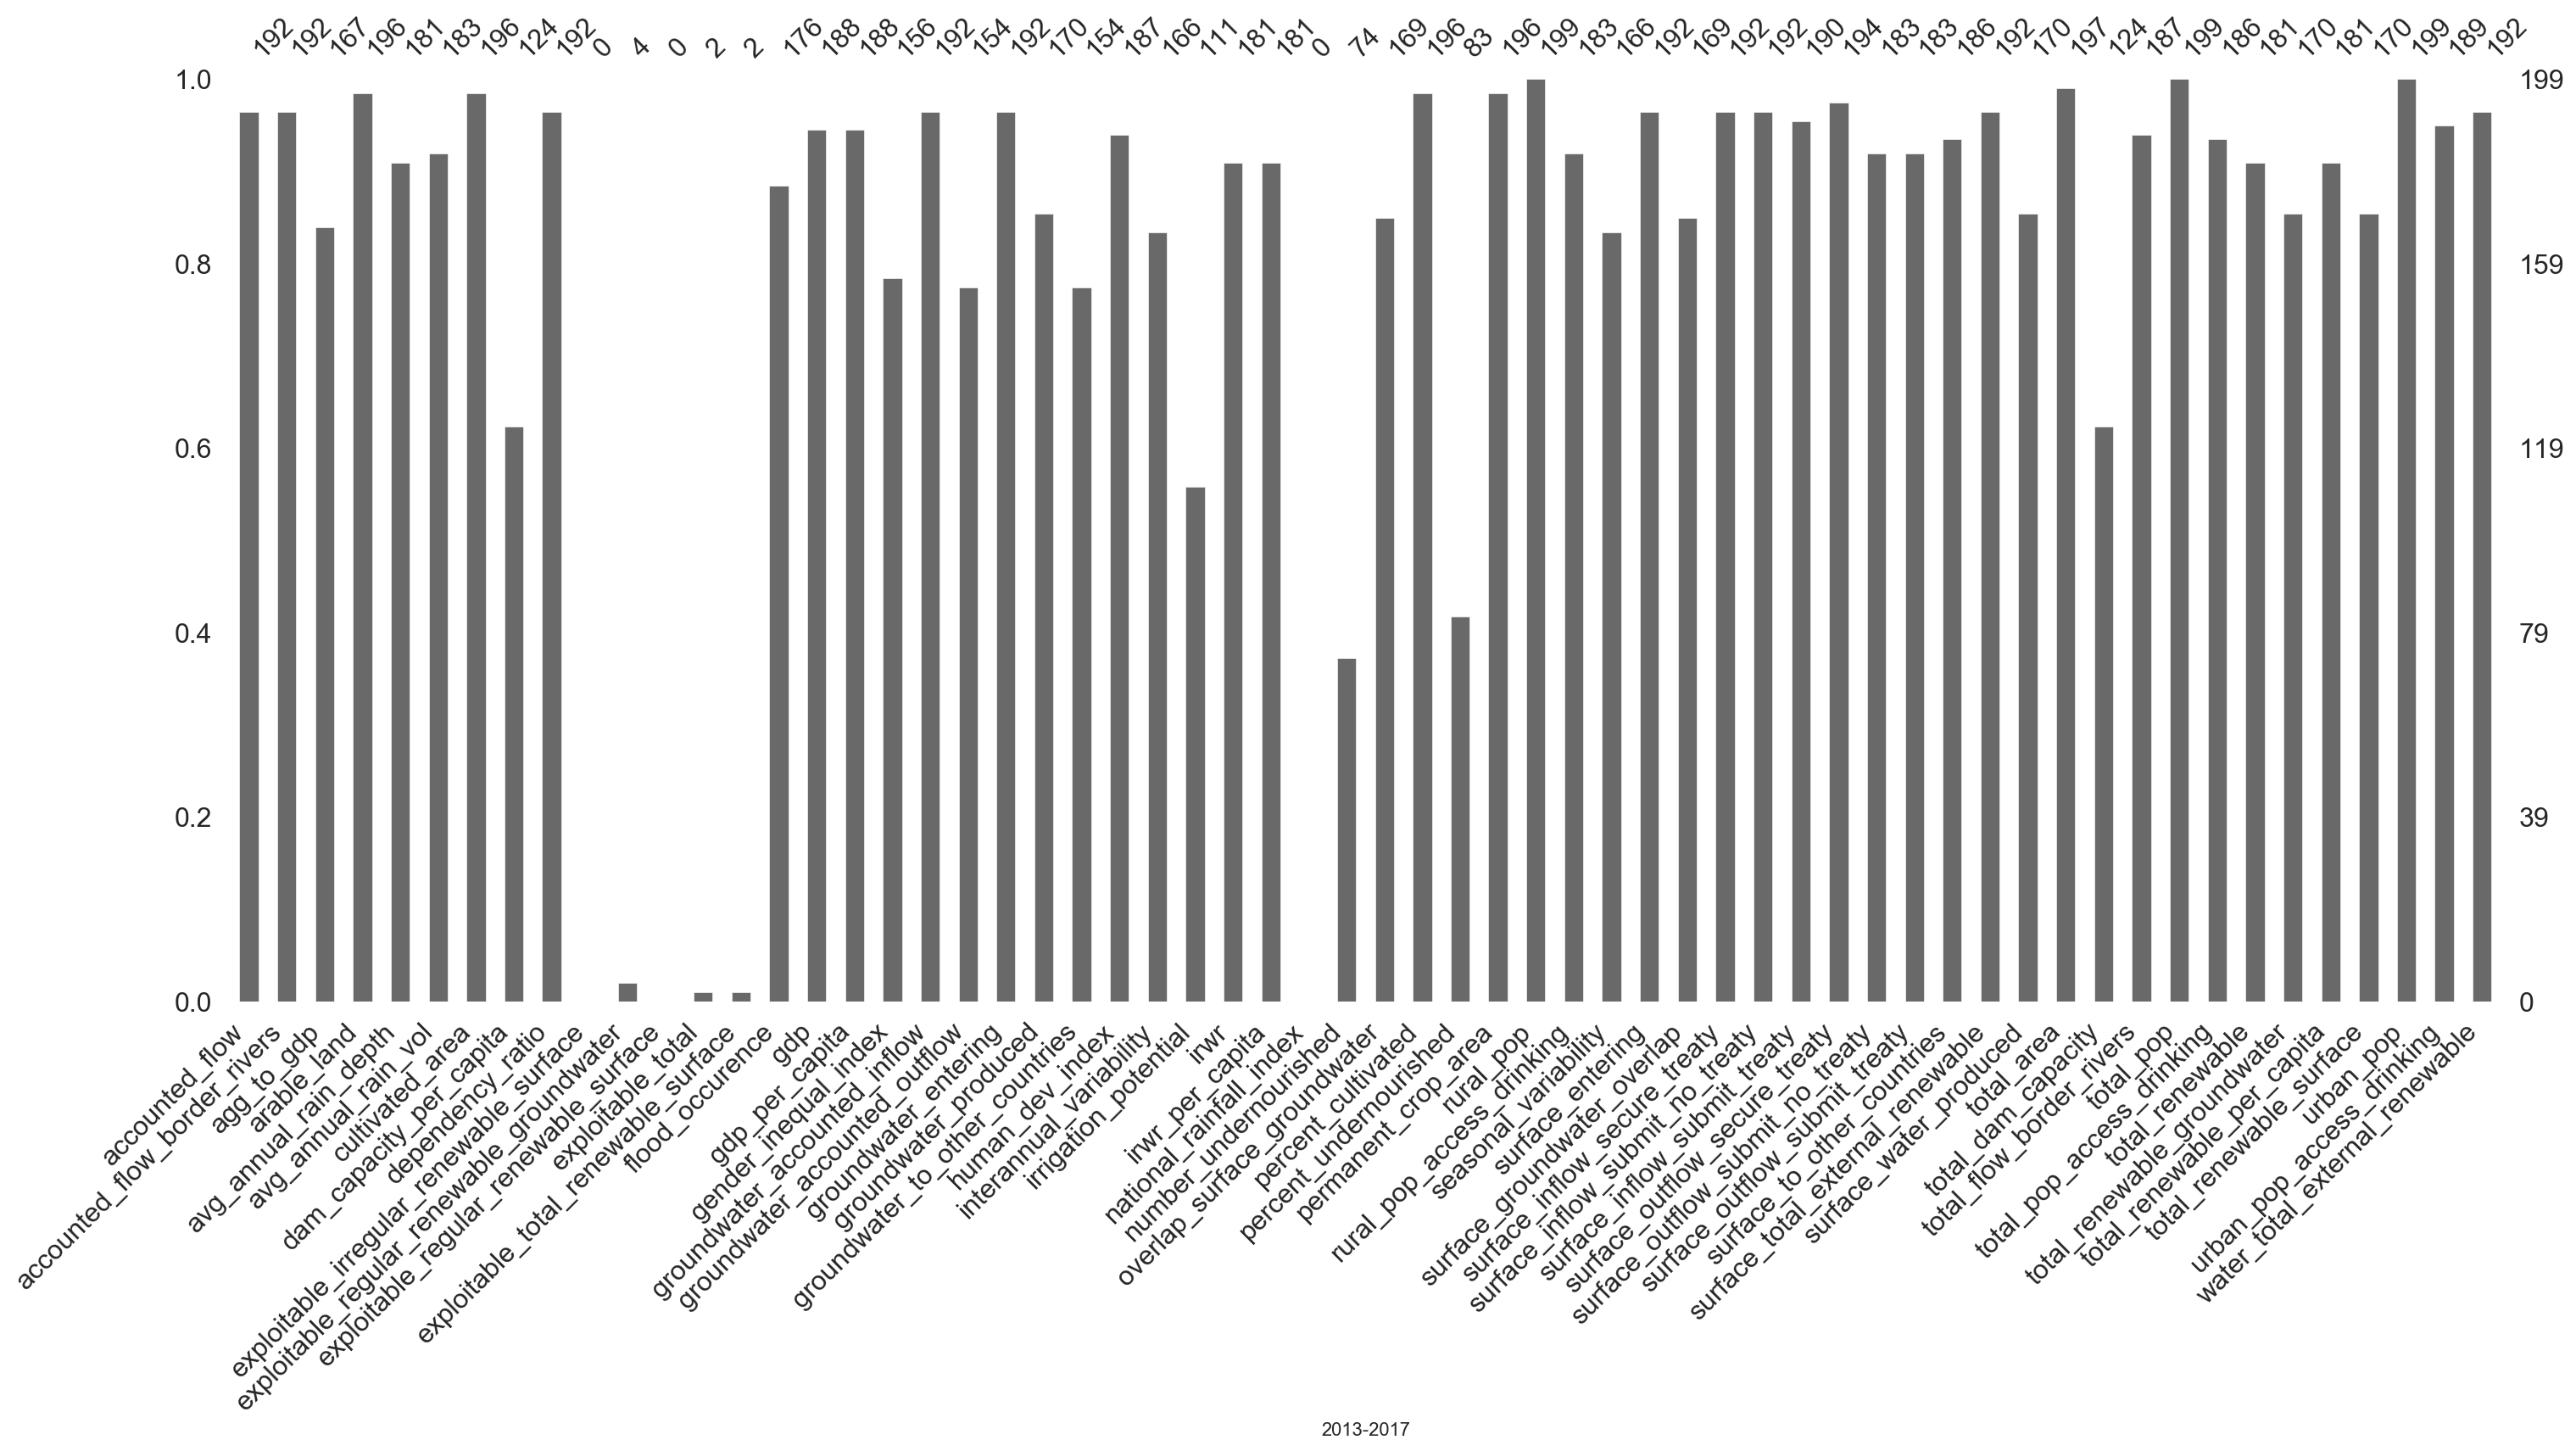

In [20]:
msno.bar(recent, labels=True)

#### This clearly shows that we are not having data for every country at every time period. i.e., we are having imbalanced data

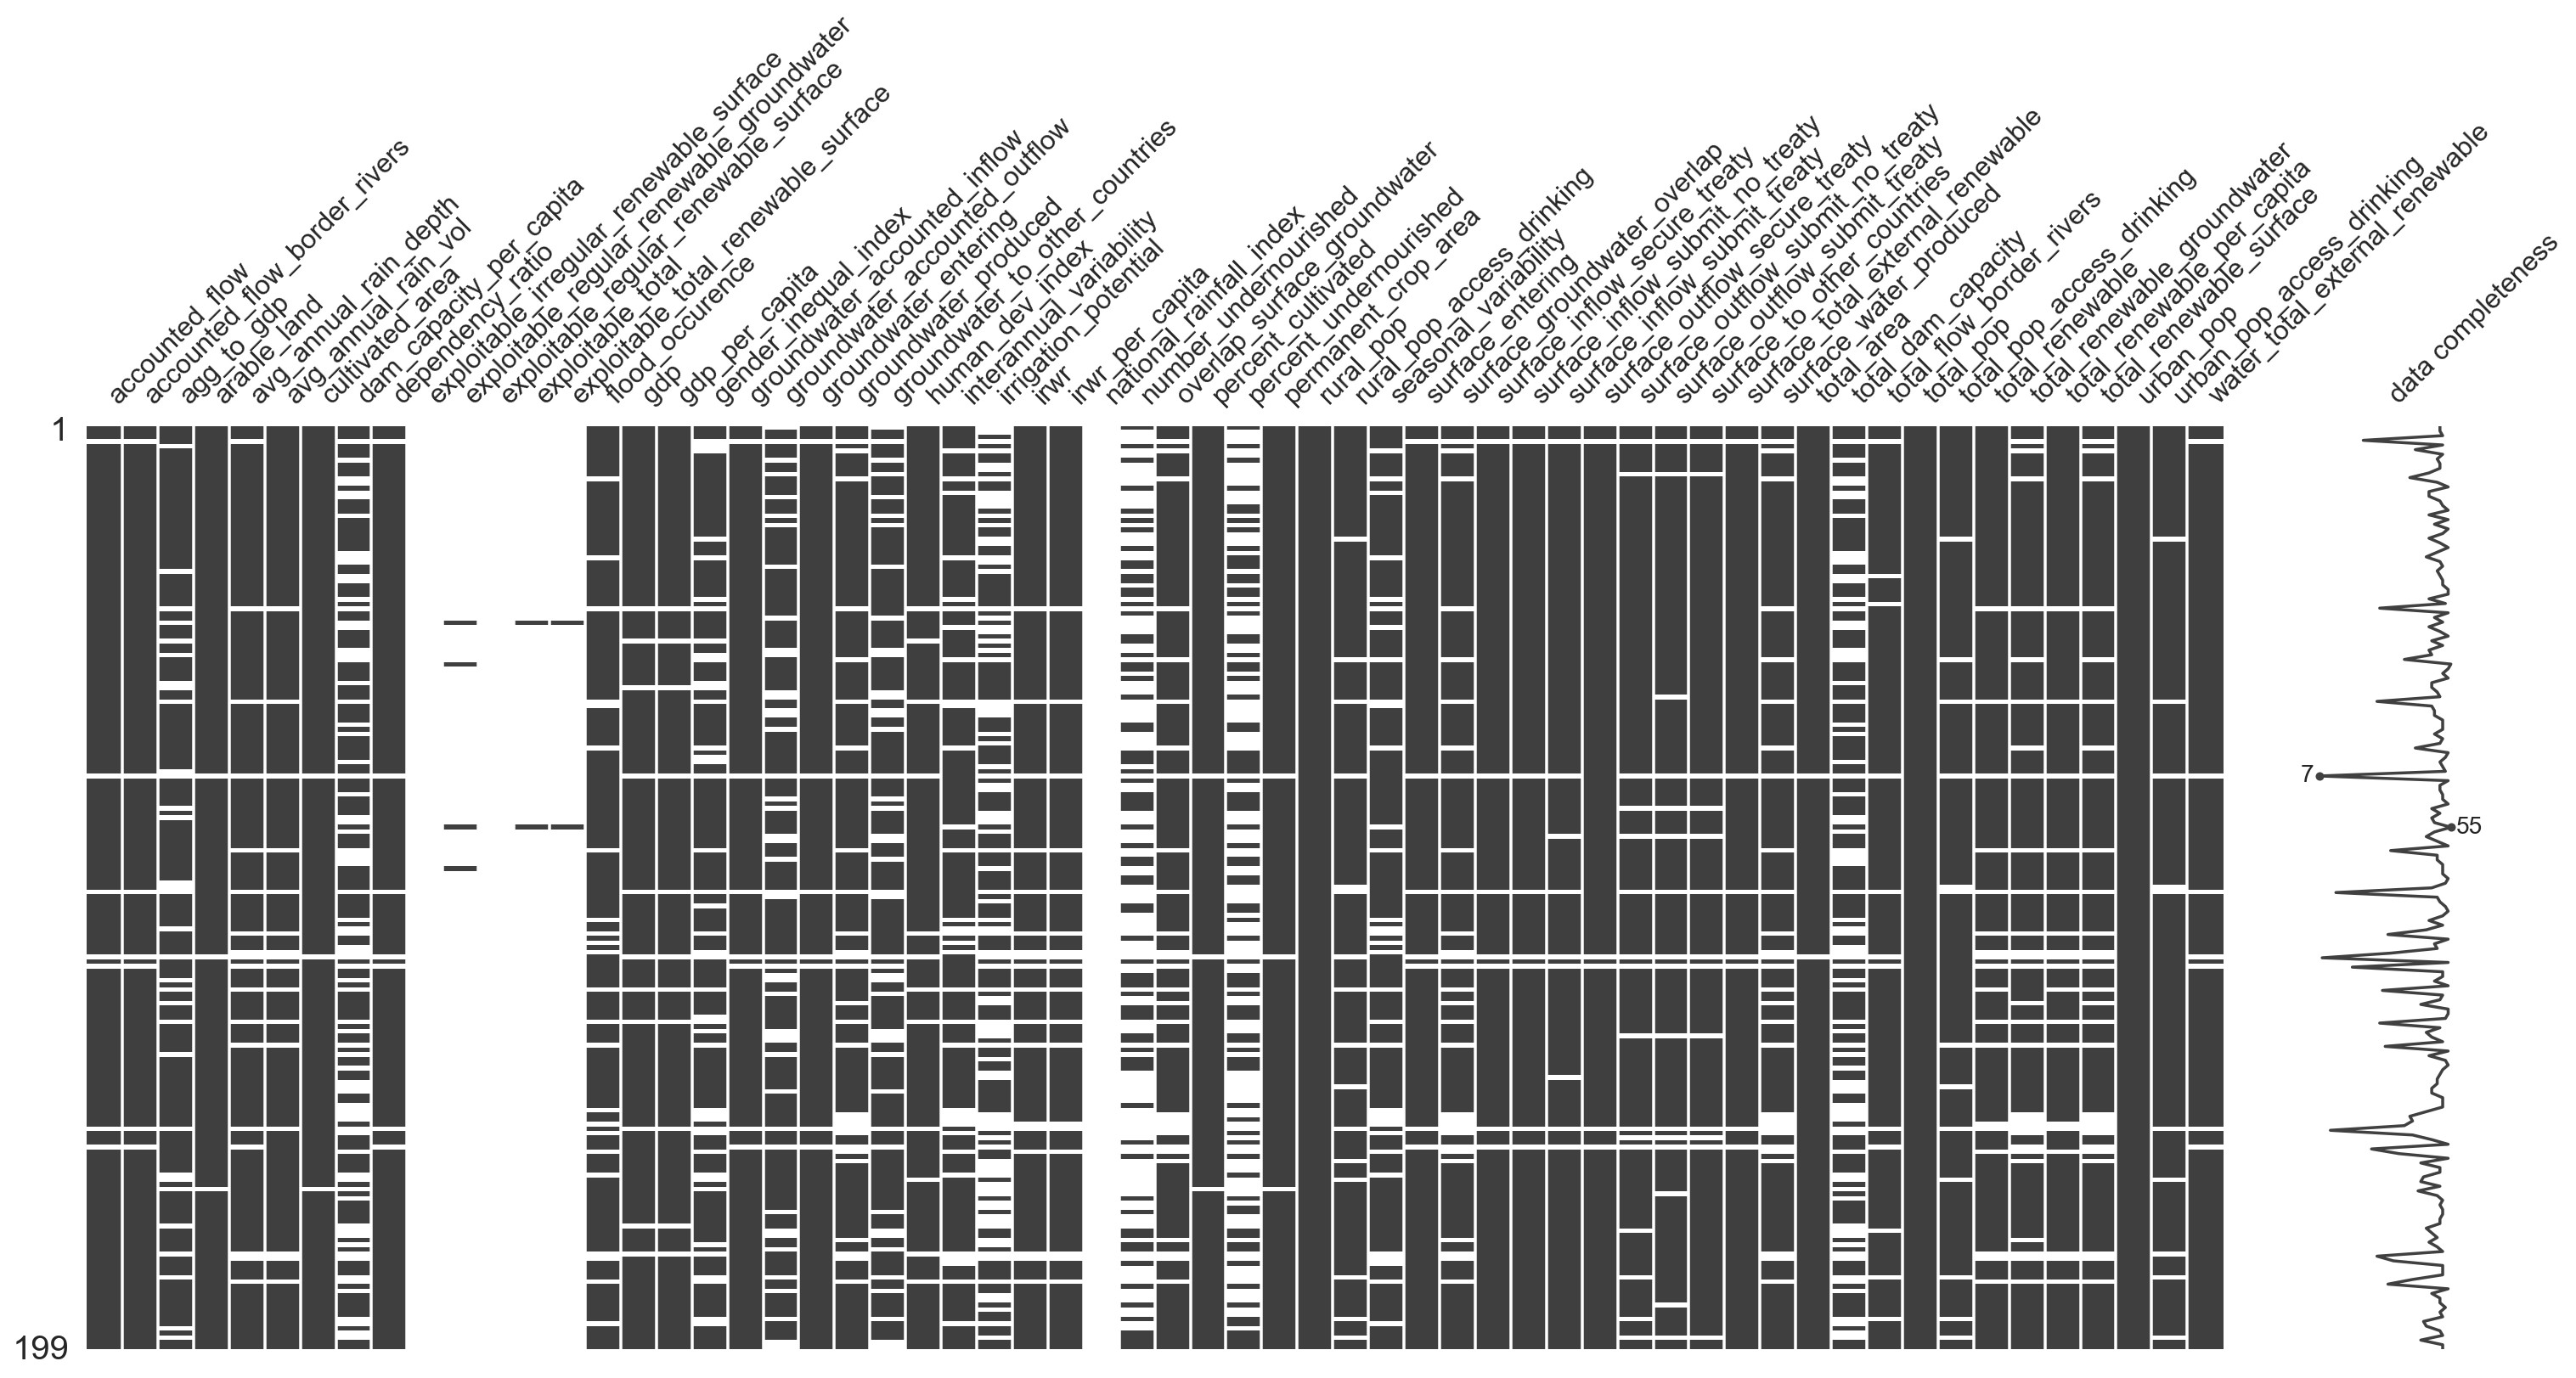

In [21]:
msno.matrix(recent, labels=True)

### We can see the 'exploitable' data is missed for most of the coutries. Does this happen in every time period?

Text(0.5, 1.0, 'Missing total exploitable water resources data across countries and time periods \n \n \n \n')

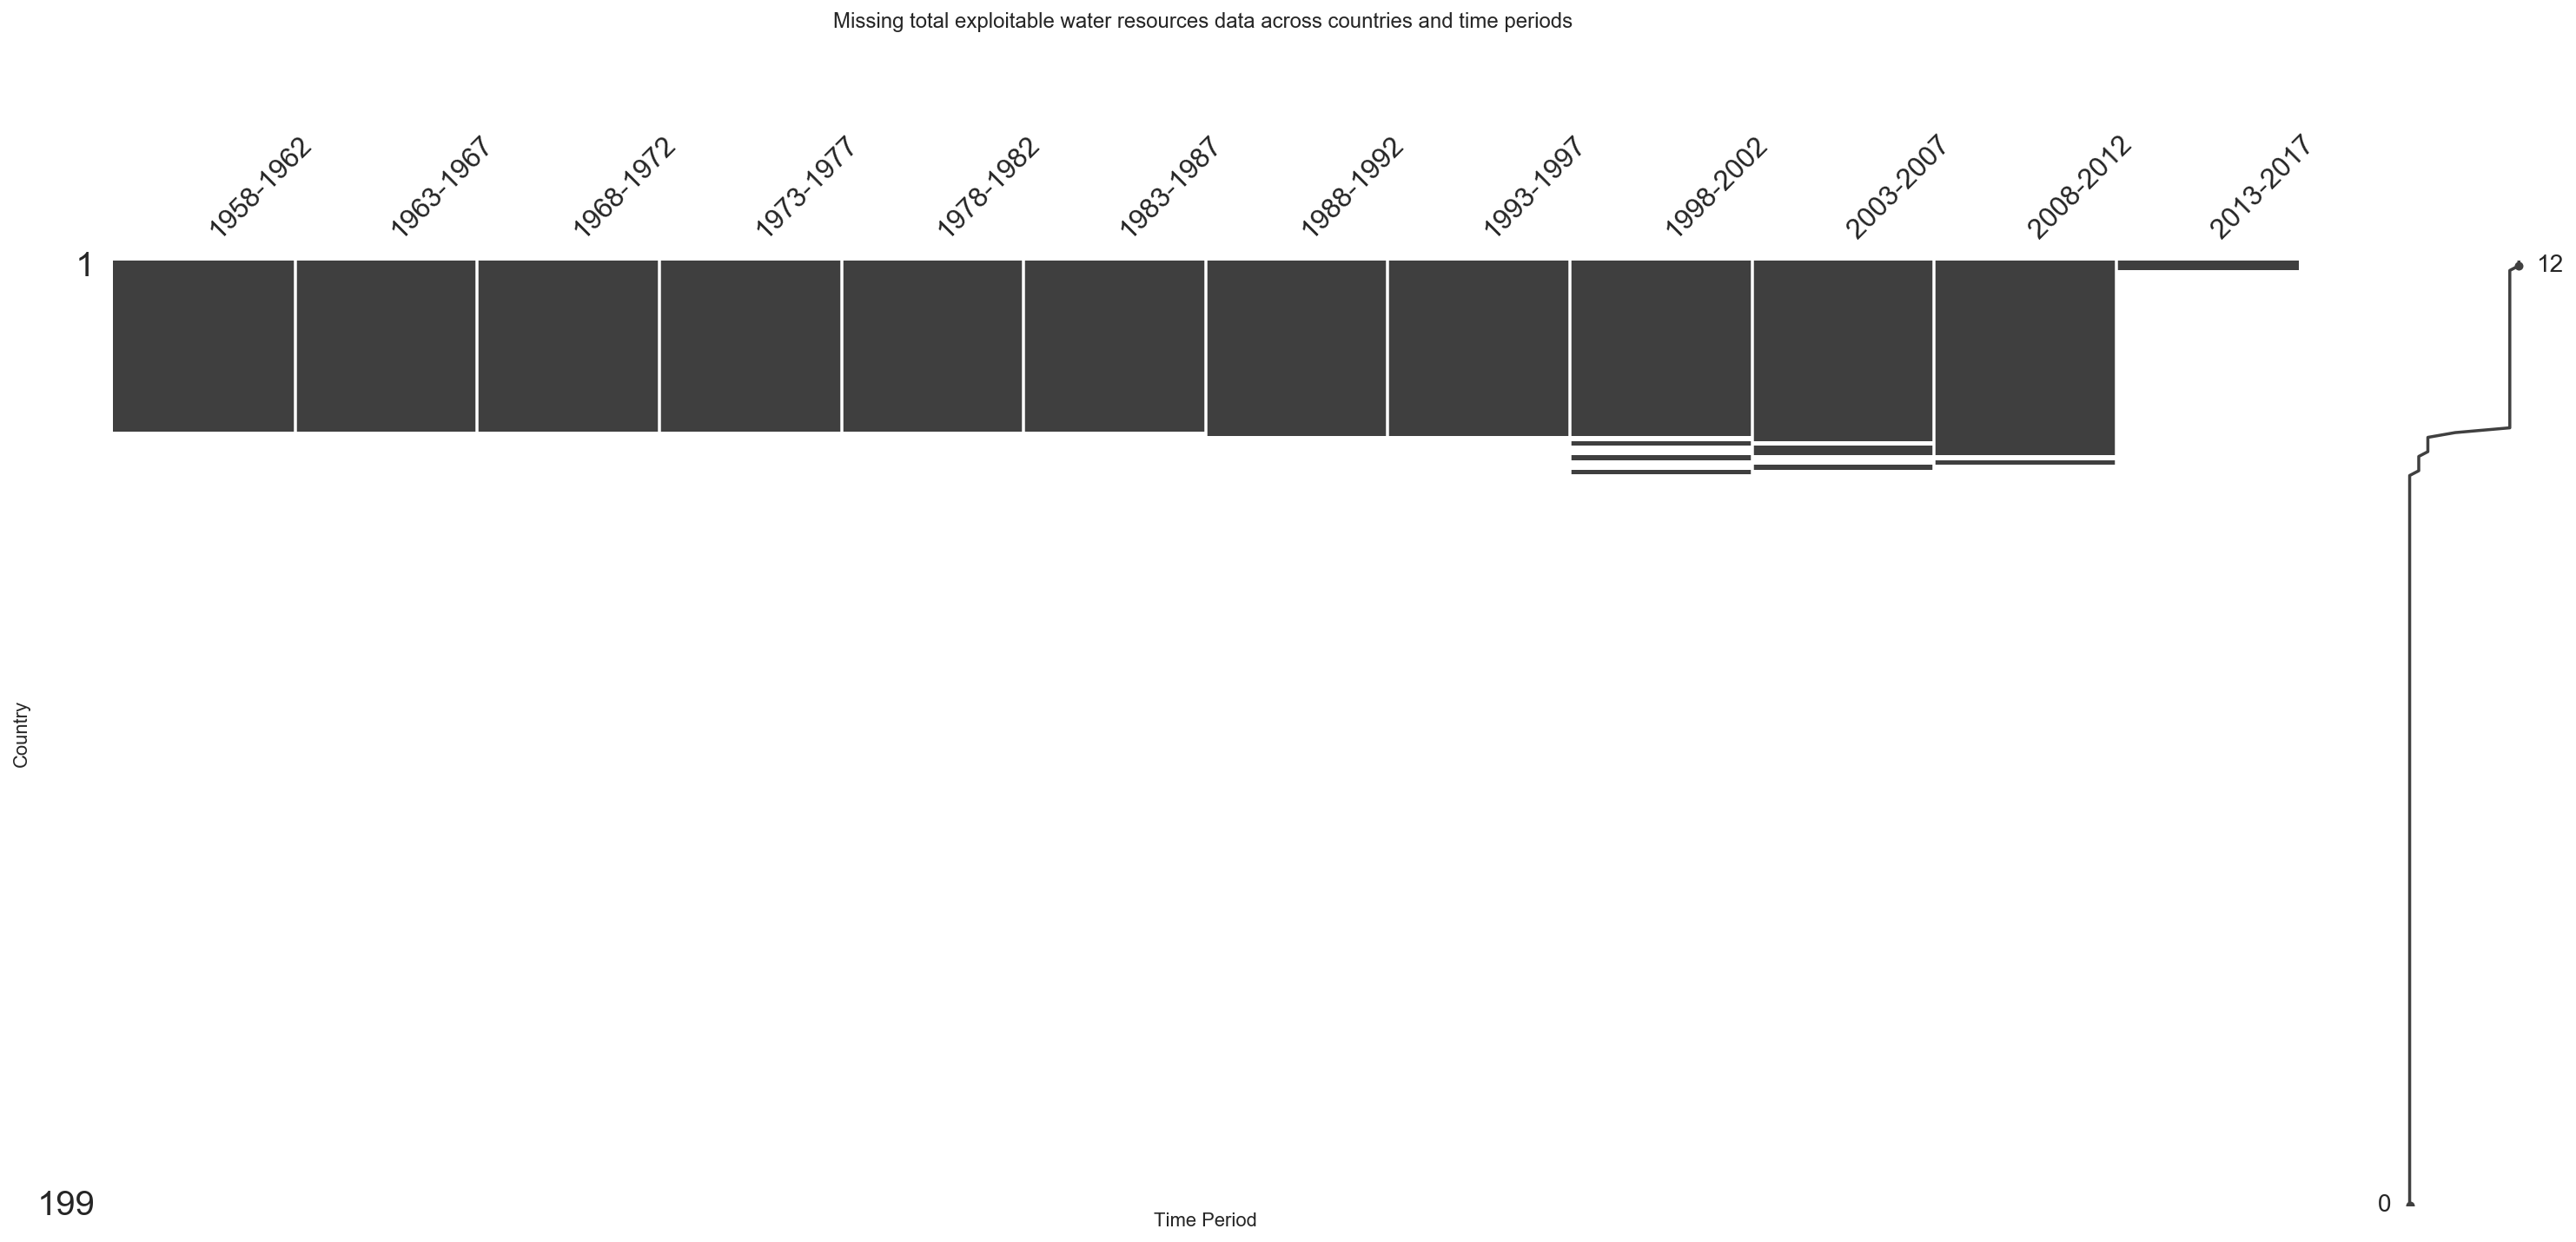

In [22]:
msno.matrix(variable_slice(data, 'exploitable_total'), inline=False, sort='descending')
plt.xlabel("Time Period")
plt.ylabel("Country")
plt.title("Missing total exploitable water resources data across countries and time periods \n \n \n \n")

Possible reasons to have such missing data for exploitable resources are
1. Data hasn't been reported *yet*
2. Most coutries have stopped reporting on this factor.
3. I don't have domain knowledge to understand what's happening. 

A column with such few data points doesn't add any value in further analysis. Hence, dropping

In [23]:
data = data.loc[~data.variable.str.contains('exploitable'),:]

#### As per the recent data, 'national_rainfall_index' has no data at all.

Text(0.5, 1.0, 'Missing total national_rainfall_index water resources data across countries and time periods \n \n \n \n')

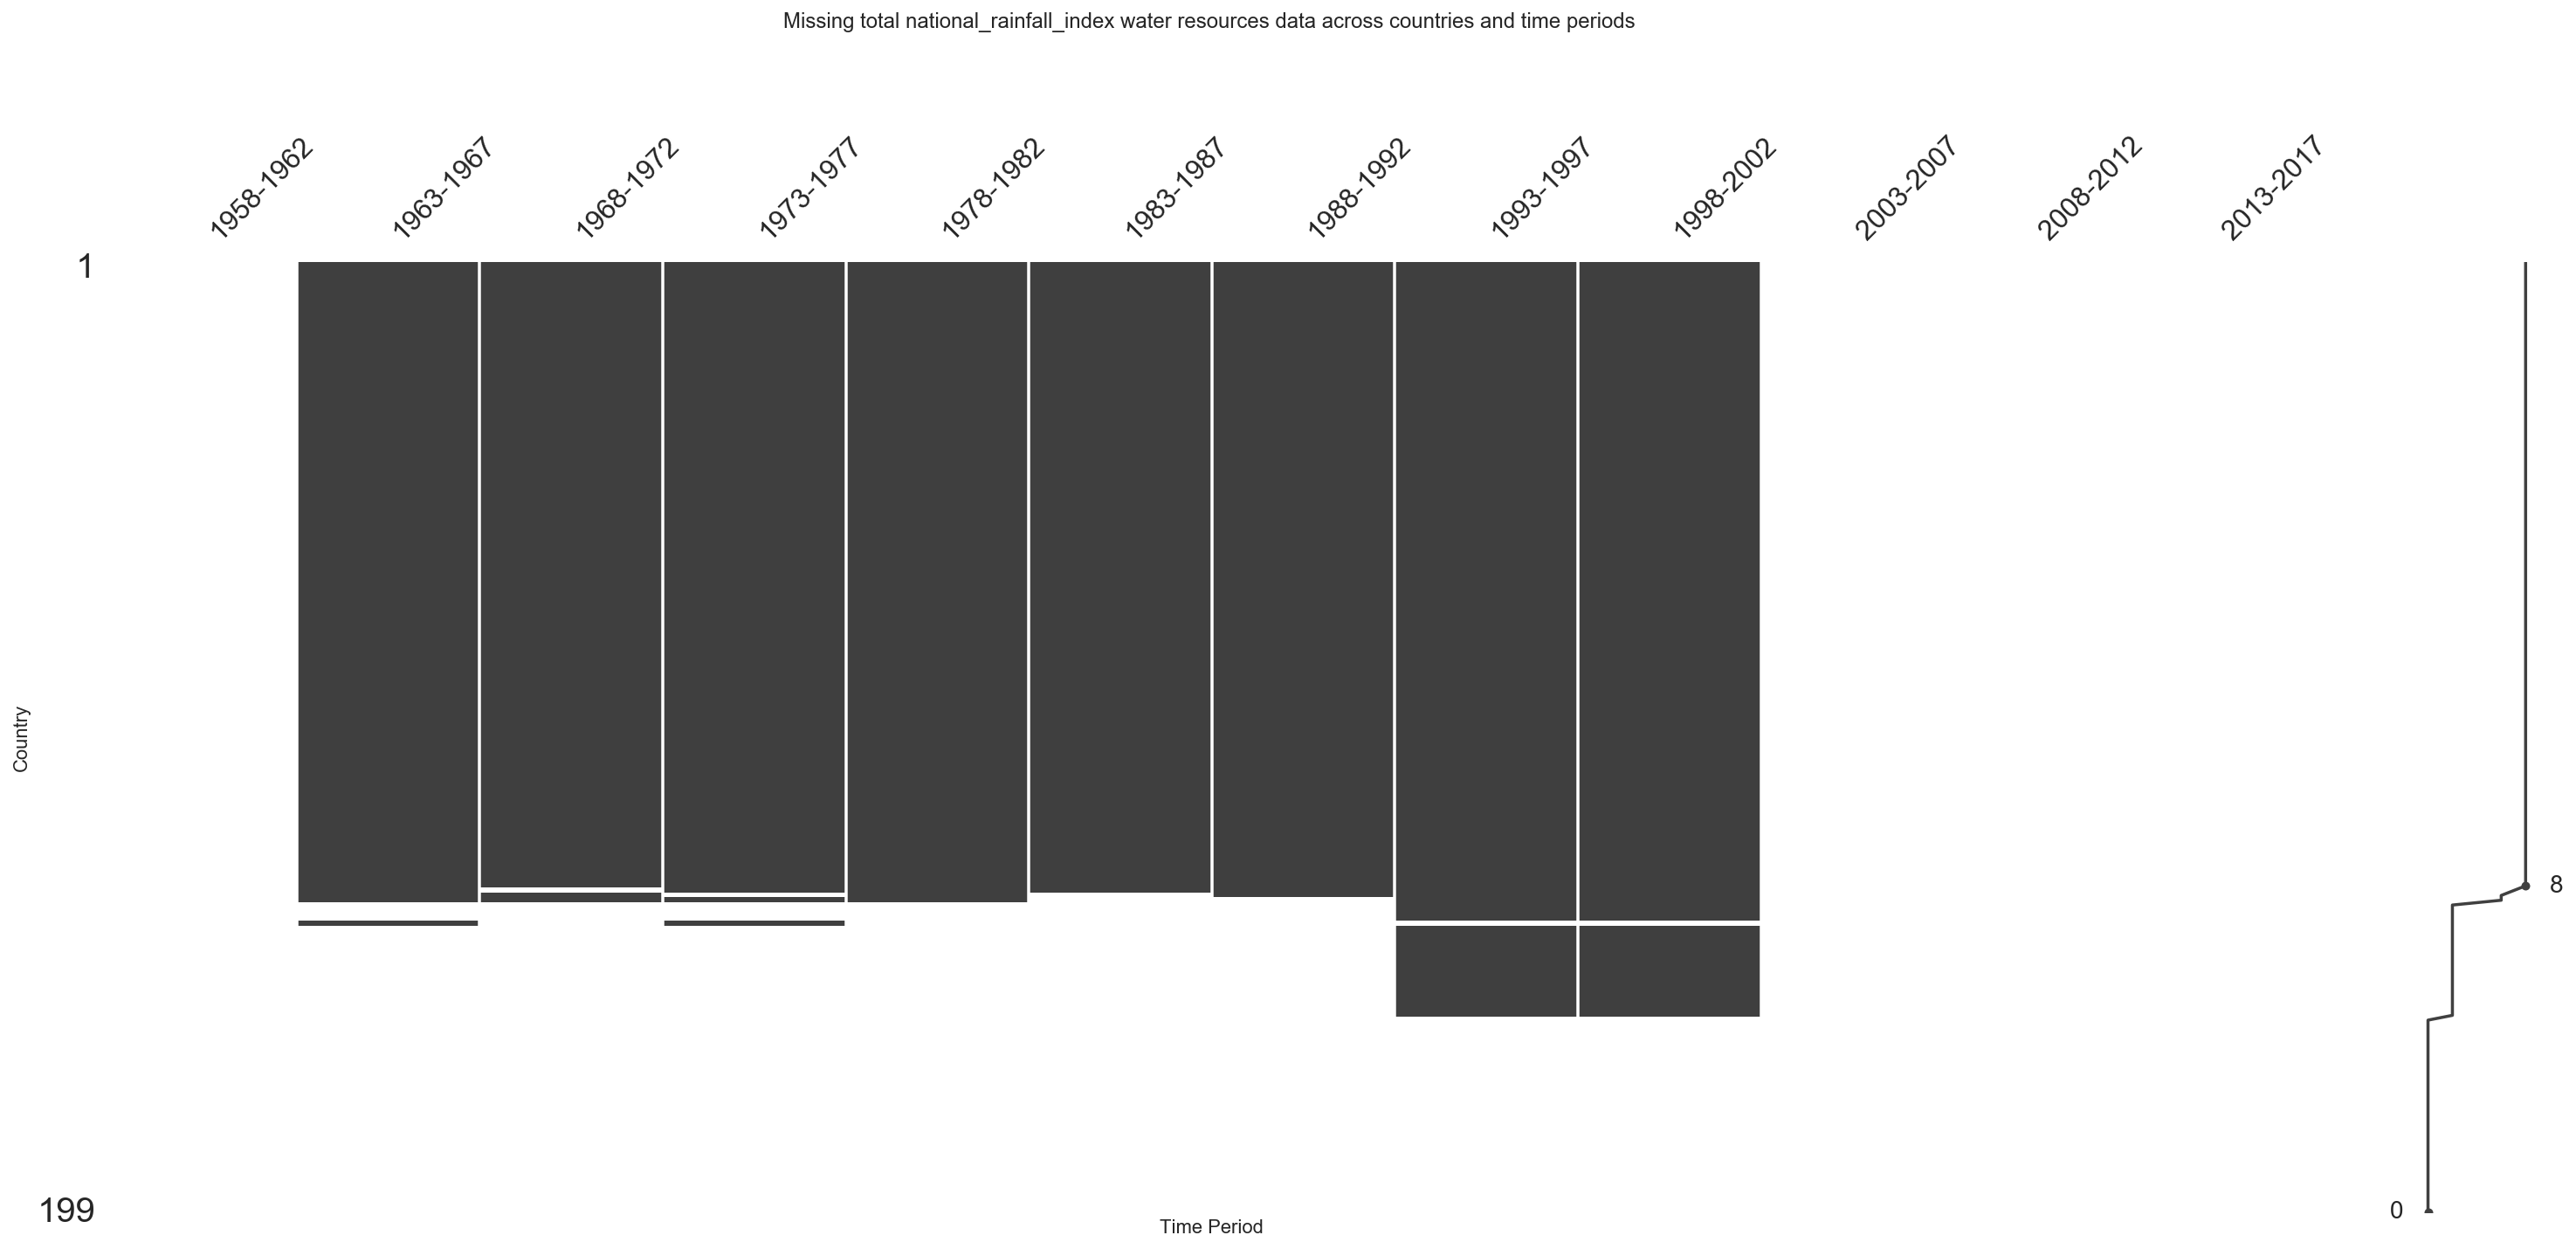

In [24]:
msno.matrix(variable_slice(data, 'national_rainfall_index'), inline=False, sort='descending')
plt.xlabel("Time Period")
plt.ylabel("Country")
plt.title("Missing total national_rainfall_index water resources data across countries and time periods \n \n \n \n")

from 2002, this data hasn't been reported at all. Hence dropping this

In [25]:
data = data.loc[~(data.variable == 'national_rainfall_index')]

In [26]:
north_america = get_subregion(data, 'North America')
msno.nullity_sort(time_slice(north_america, '2013-2017'), sort='descending')

2013-2017                         accounted_flow  \
country                                            
Guatemala                                 18.710   
Costa Rica                                 0.000   
Dominican Republic                         0.000   
Panama                                     2.704   
Nicaragua                                  8.310   
El Salvador                               10.640   
Honduras                                   1.504   
Haiti                                      1.015   
Trinidad and Tobago                        0.000   
Belize                                     6.474   
Jamaica                                    0.000   
United States of America                 251.000   
Mexico                                    53.320   
Canada                                    52.000   
Cuba                                       0.000   
Barbados                                   0.000   
Saint Kitts and Nevis                      0.000   
Grenada                                    0.000   
Antigua and Barbuda                        0.000   
Saint Vincent and the Grenadines           0.000   
Saint Lucia                                0.000   
Bahamas                                    0.000   
Dominica                                   0.000   

2013-2017                         accounted_flow_border_rivers  agg_to_gdp  \
country                                                                      
Guatemala                                                0.000     11.1300   
Costa Rica                                               0.000      5.6080   
Dominican Republic                                       0.000      6.5740   
Panama                                                   2.704      2.8910   
Nicaragua                                                0.000     18.8100   
El Salvador                                              0.000     11.2800   
Honduras                                                 0.000     13.8700   
Haiti                                                    0.000         NaN   
Trinidad and Tobago                                      0.000      0.4767   
Belize                                                   0.432     15.5200   
Jamaica                                                  0.000      7.4980   
United States of America                                 0.000      1.3340   
Mexico                                                   0.000      3.7060   
Canada                                                   0.000         NaN   
Cuba                                                     0.000         NaN   
Barbados                                                 0.000      1.4440   
Saint Kitts and Nevis                                    0.000      1.3060   
Grenada                                                  0.000      7.8080   
Antigua and Barbuda                                      0.000      2.3720   
Saint Vincent and the Grenadines                         0.000      7.8300   
Saint Lucia                                              0.000      2.9950   
Bahamas                                                  0.000      1.7680   
Dominica                                                 0.000     14.6800   

2013-2017                         arable_land  avg_annual_rain_depth  \
country                                                                
Guatemala                               933.8                 1996.0   
Costa Rica                              232.1                 2926.0   
Dominican Republic                      800.0                 1410.0   
Panama                                  563.0                 2928.0   
Nicaragua                              1504.0                 2280.0   
El Salvador                             750.0                 1784.0   
Honduras                               1020.0                 1976.0   
Haiti                                  1070.0                 1440.0   
Trinidad and Tobago         

Looking at North America data

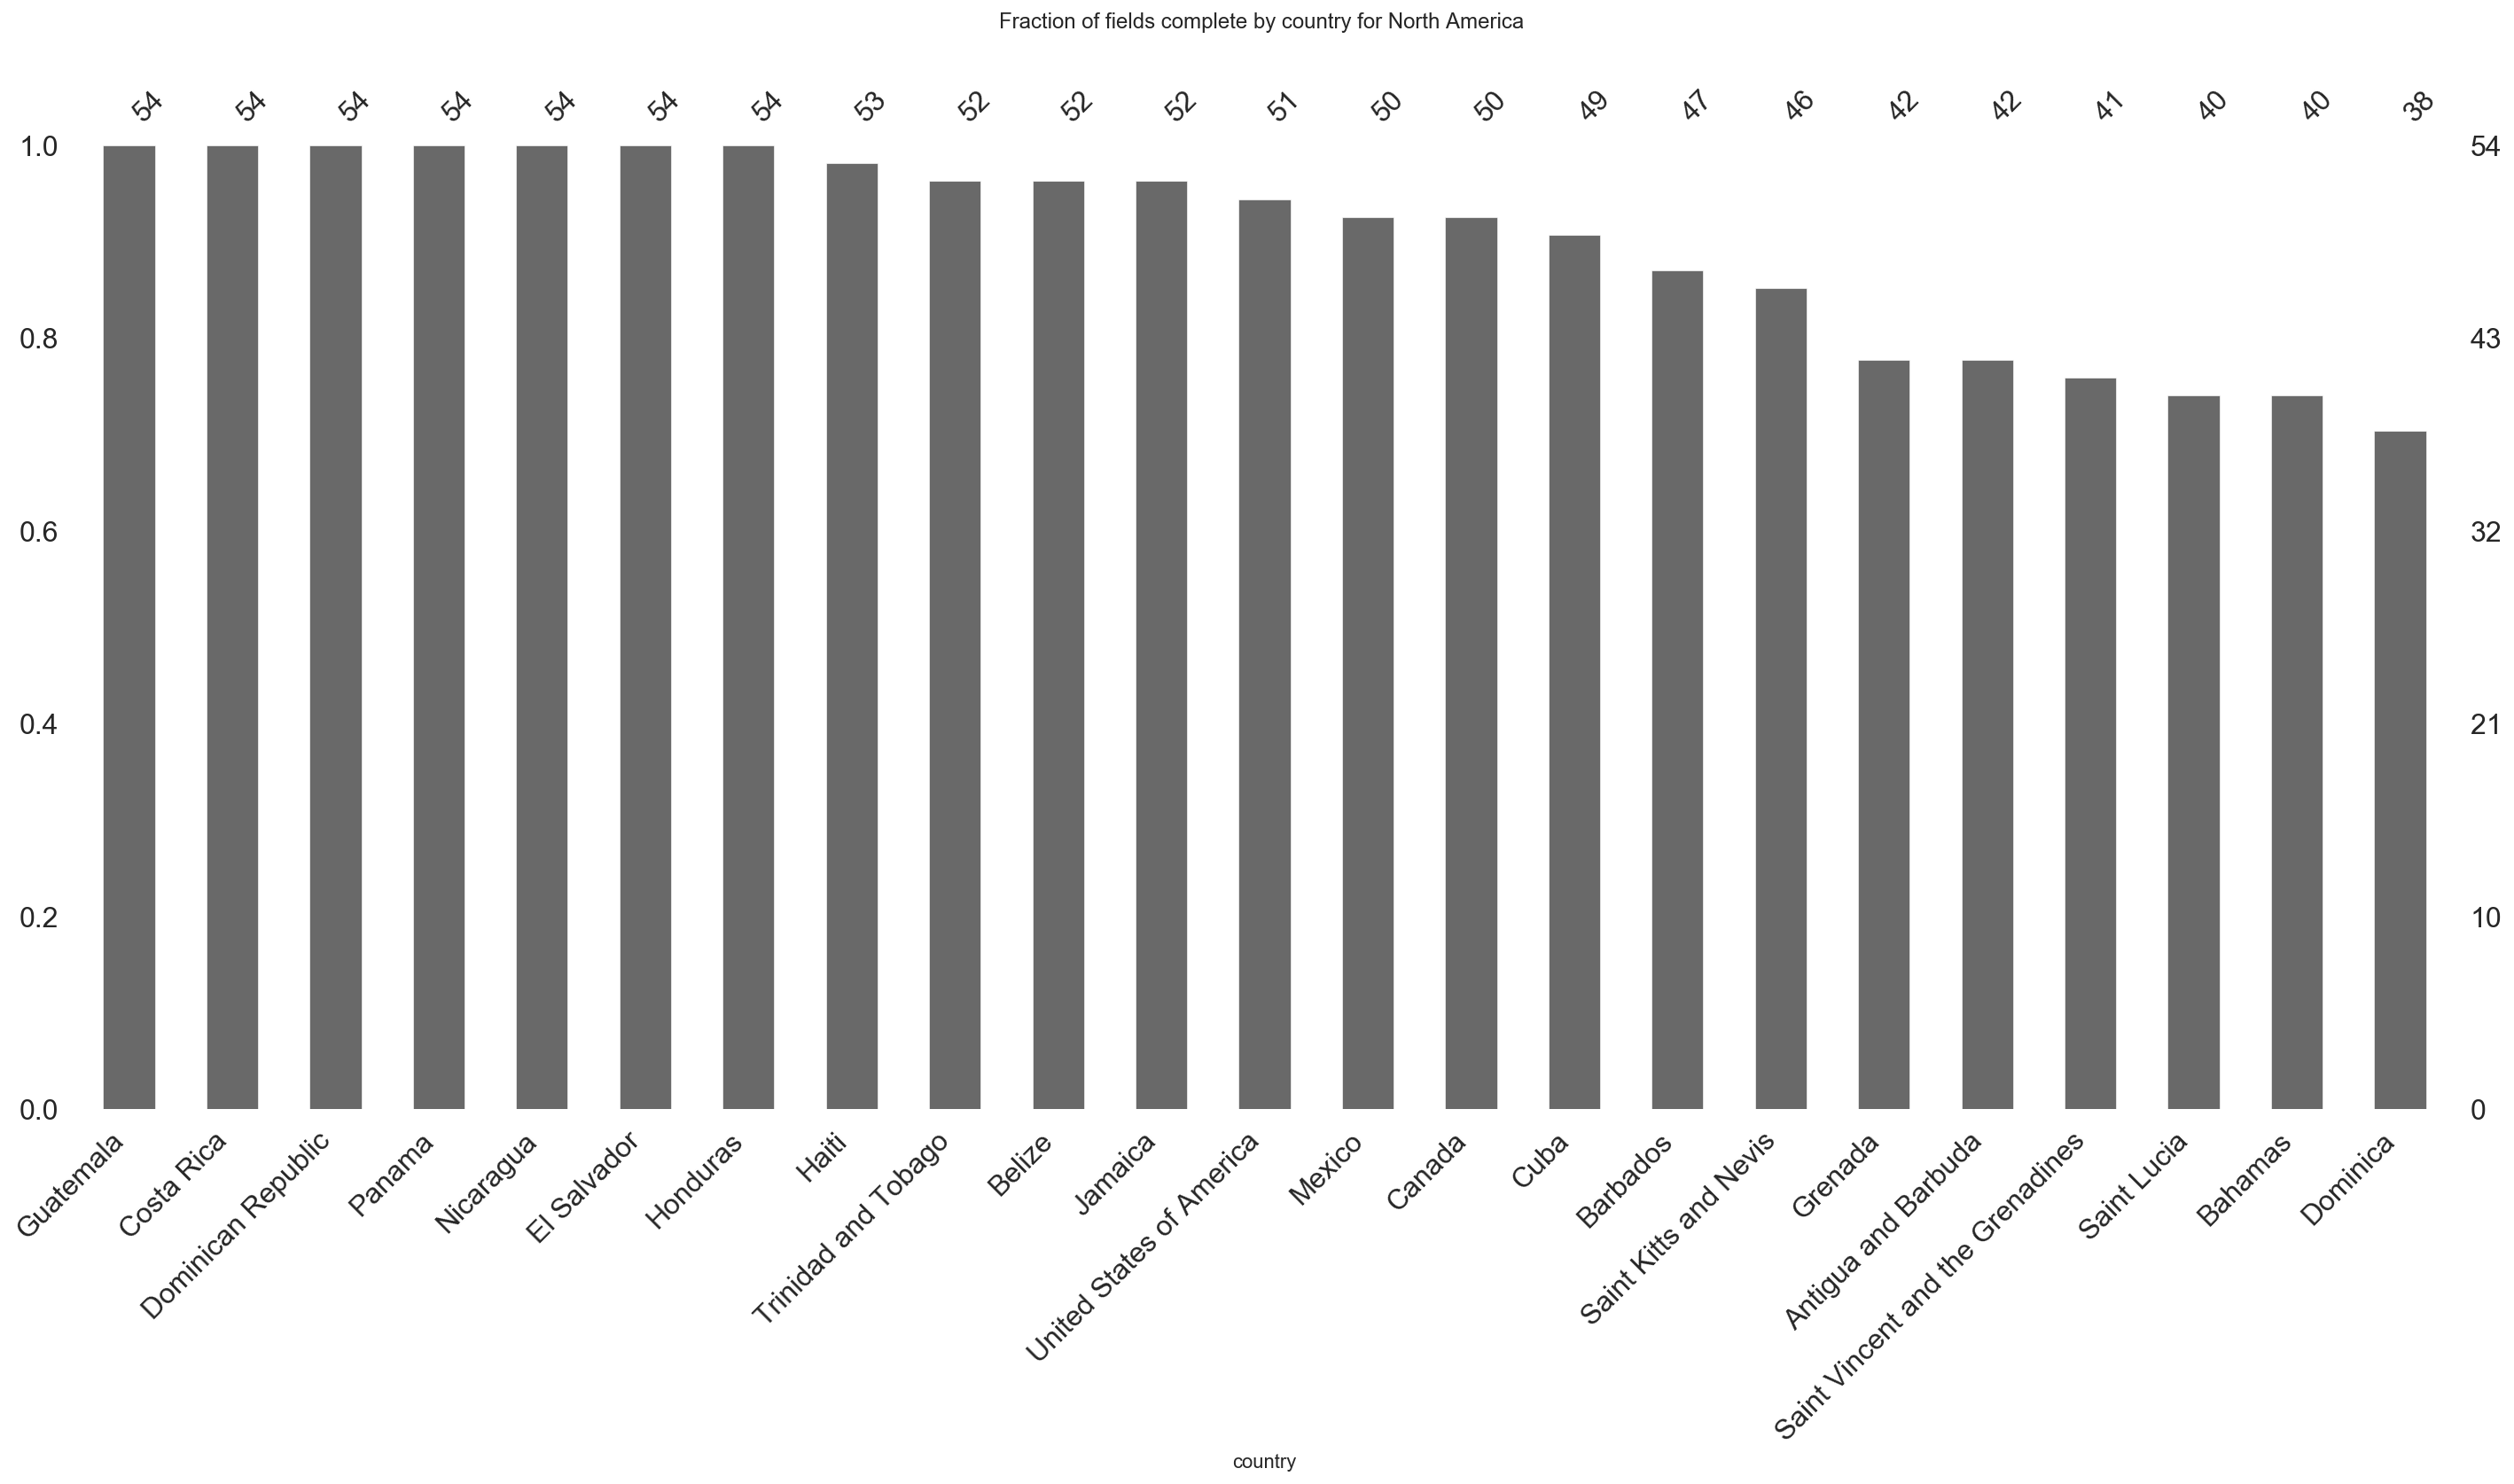

In [27]:
north_america = get_subregion(data, 'North America')
msno.bar(msno.nullity_sort(time_slice(north_america, '2013-2017'), sort='descending').T, inline=False)
plt.title('Fraction of fields complete by country for North America \n \n');

Is there any pattern in the coutries with most missing data? What are the potential reasons for missing data?

In [28]:
# Bahamas location
folium.Map(location=[18.1160128,-77.8364762], tiles="CartoDB positron",  zoom_start=5, width=1200, height=600)

Check what data is missing in Bahamas

In [29]:
msno.nullity_filter(country_slice(data, 'Bahamas').T, filter="bottom", p=0.1)

variable   dam_capacity_per_capita  flood_occurence  gender_inequal_index  \
Bahamas                                                                     
1958-1962                      NaN              NaN                   NaN   
1963-1967                      NaN              NaN                   NaN   
1968-1972                      NaN              NaN                   NaN   
1973-1977                      NaN              NaN                   NaN   
1978-1982                      NaN              NaN                   NaN   
1983-1987                      NaN              NaN                   NaN   
1988-1992                      NaN              NaN                   NaN   
1993-1997                      NaN              NaN                   NaN   
1998-2002                      NaN              NaN                   NaN   
2003-2007                      NaN              NaN                   NaN   
2008-2012                      NaN              NaN                   NaN   
2013-2017                      NaN              NaN                0.2979   

variable   groundwater_produced  interannual_variability  \
Bahamas                                                    
1958-1962                   NaN                      NaN   
1963-1967                   NaN                      NaN   
1968-1972                   NaN                      NaN   
1973-1977                   NaN                      NaN   
1978-1982                   NaN                      NaN   
1983-1987                   NaN                      NaN   
1988-1992                   NaN                      NaN   
1993-1997                   NaN                      NaN   
1998-2002                   NaN                      NaN   
2003-2007                   NaN                      NaN   
2008-2012                   NaN                      NaN   
2013-2017                   NaN                      NaN   

variable   irrigation_potential  number_undernourished  \
Bahamas                                                  
1958-1962                   NaN                    NaN   
1963-1967                   NaN                    NaN   
1968-1972                   NaN                    NaN   
1973-1977                   NaN                    NaN   
1978-1982                   NaN                    NaN   
1983-1987                   NaN                    NaN   
1988-1992                   NaN                    NaN   
1993-1997                   NaN                    NaN   
1998-2002                   NaN                    NaN   
2003-2007                   NaN                    NaN   
2008-2012                   NaN                    NaN   
2013-2017                   NaN                    NaN   

variable   overlap_surface_groundwater  percent_undernourished  \
Bahamas                                                          
1958-1962                          NaN                     NaN   
1963-1967                          NaN                     NaN   
1968-1972                          NaN                     NaN   
1973-1977                          NaN                     NaN   
1978-1982                          NaN                     NaN   
1983-1987                          NaN                     NaN   
1988-1992                          NaN                     NaN   
1993-1997                          NaN                     NaN   
1998-2002                          NaN                     NaN   
2003-2007                          NaN                     NaN   
2008-2012                          NaN                     NaN   
2013-2017                          NaN                     NaN   

variable   seasonal_variability  surface_groundwater_overlap  \
Bahamas                                                        
1958-1962                   NaN                          NaN   
1963-1967                   NaN                          NaN   
1968-1972                   NaN                          NaN   
1973-1977             

In [30]:
# JSON with co-ordinates for country boundries
geo_data_path = r'../data/world.json'

In [31]:
null_data = recent['agg_to_gdp'].notnull()*1
map = folium.Map(location=[48, -102], zoom_start=2)
map.choropleth(
    geo_data=geo_data_path,
    data=null_data,
    columns=['country', 'agg_to_gdp'],
    key_on='feature.properties.name', reset=True,
    fill_color='GnBu', fill_opacity=1, line_opacity=0.2,
    legend_name='Missing agricultural contribution to GDP data 2013-2017'
)
map

C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### How countries are providing data over the years

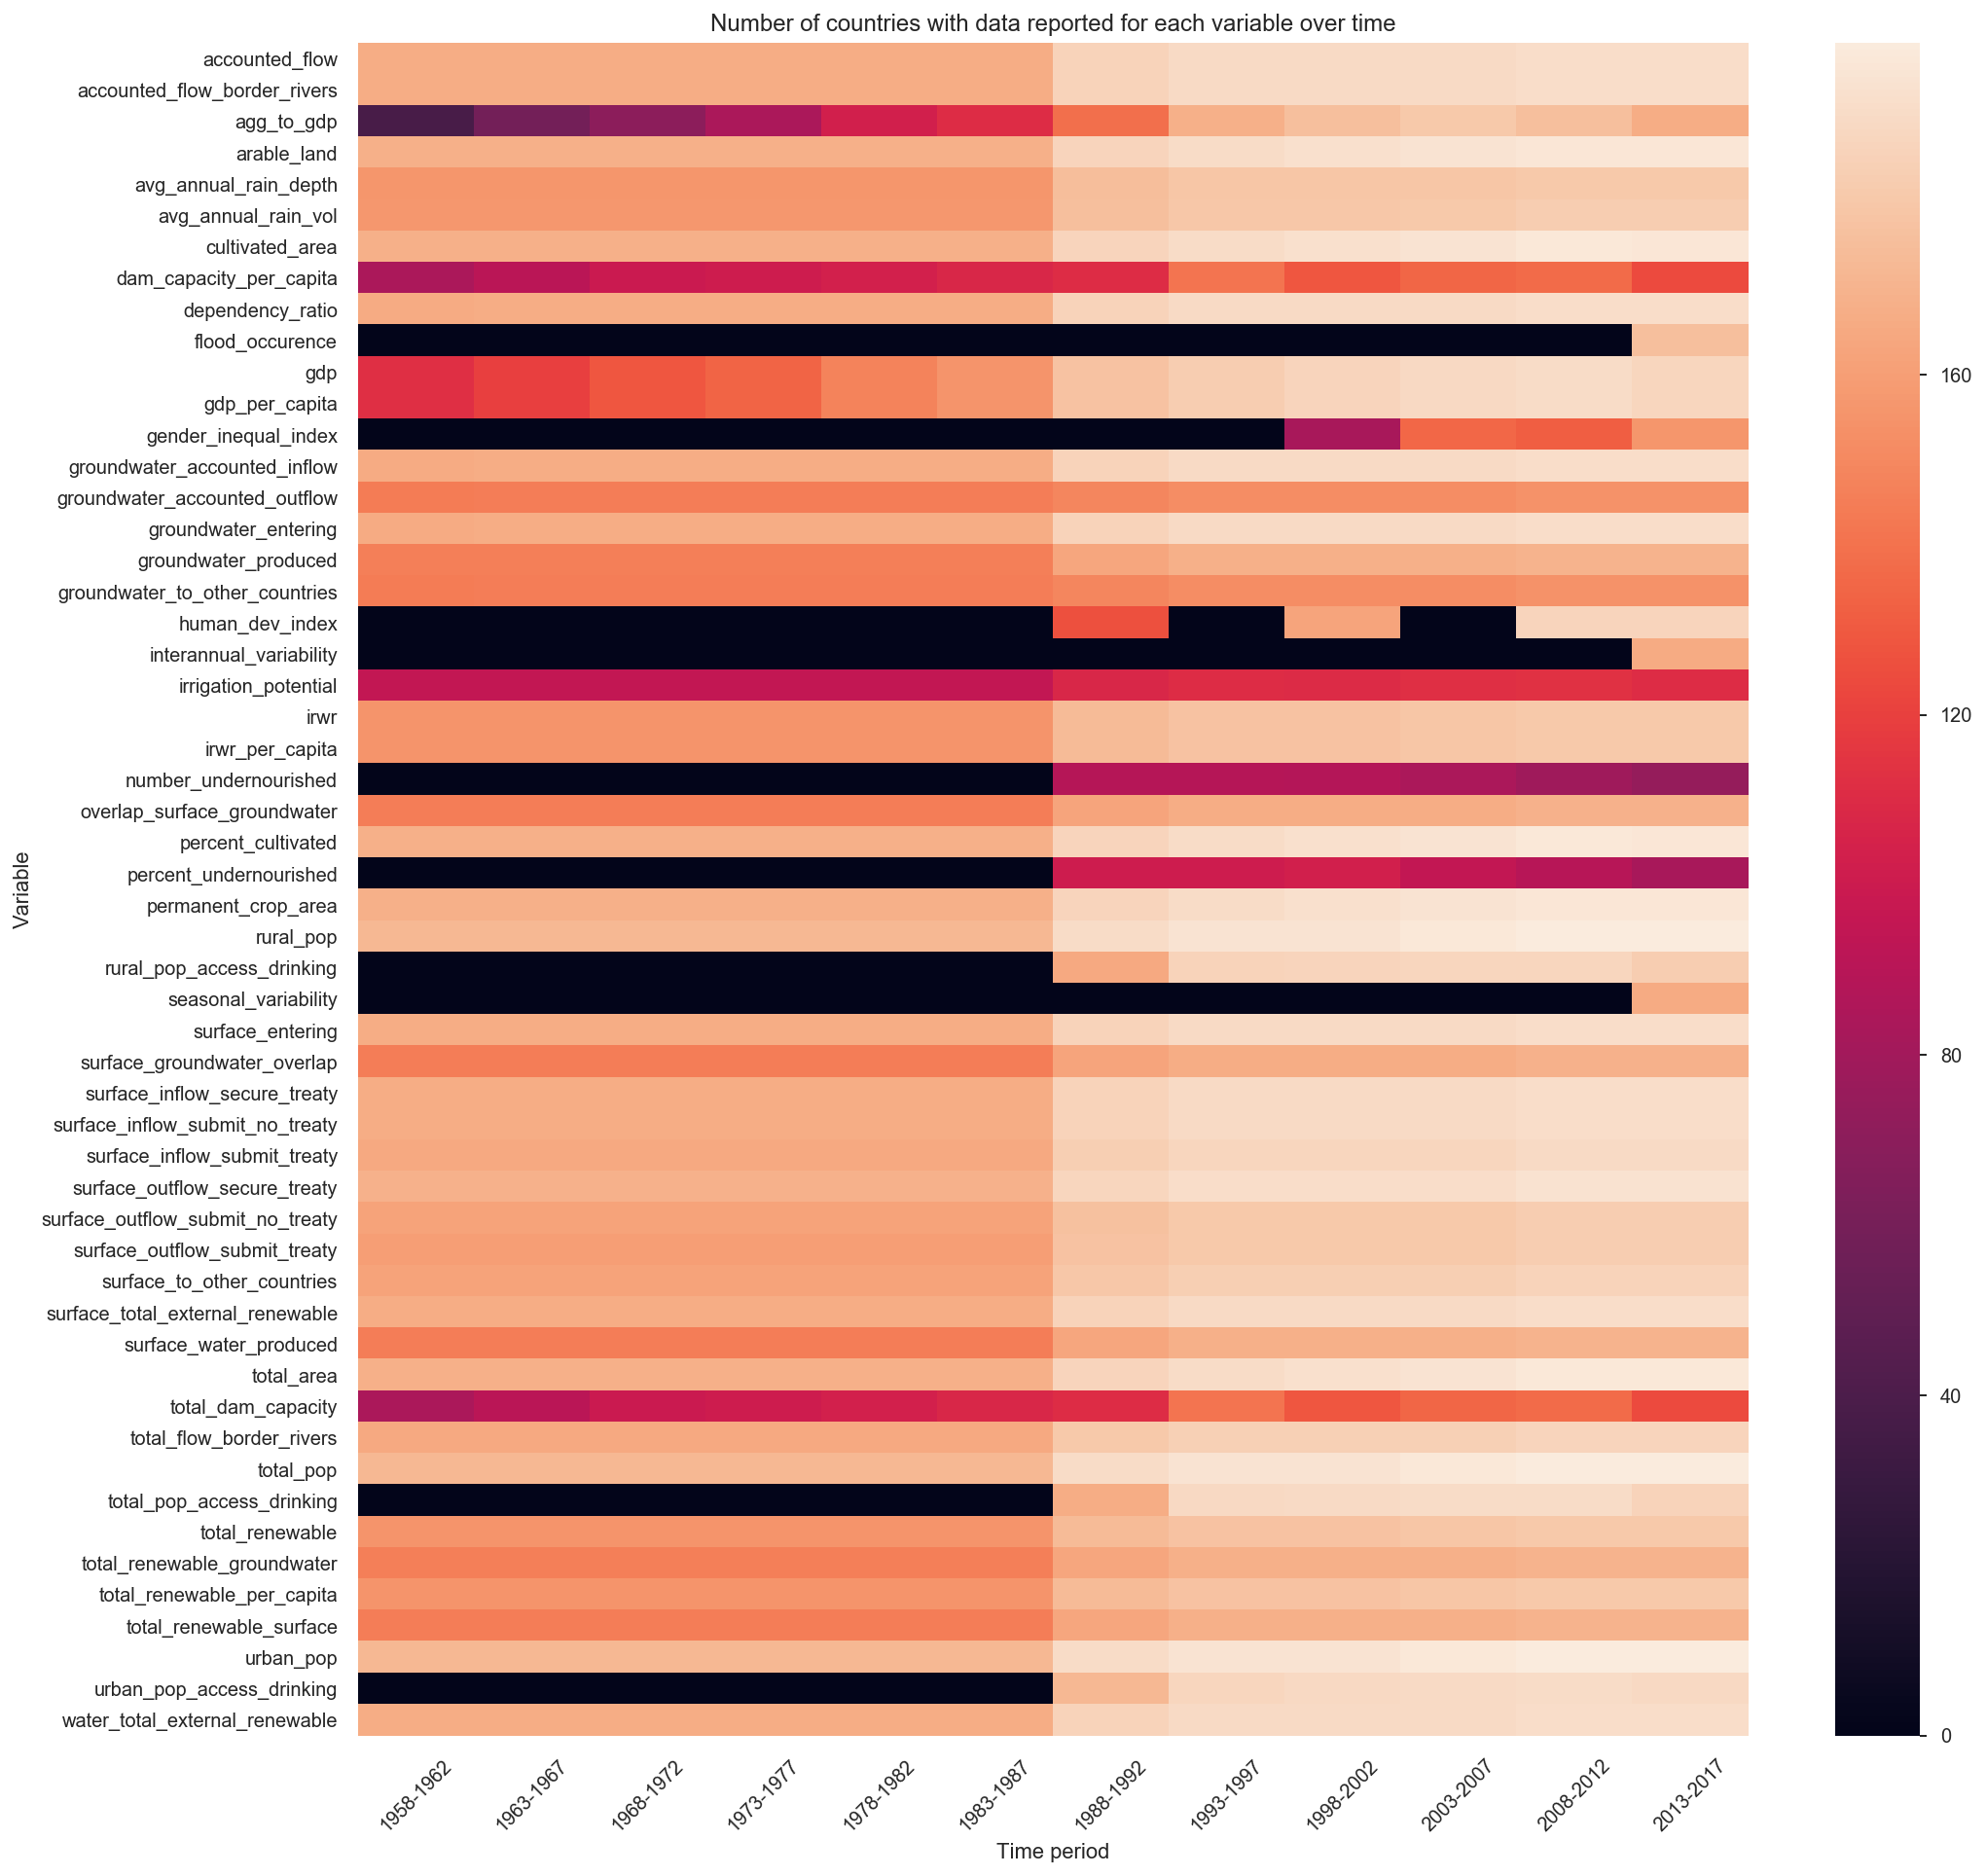

In [32]:
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(data.groupby(['time_period', 'variable']).value.count().unstack().T, ax=ax)
plt.xticks(rotation=45);
plt.xlabel('Time period');
plt.ylabel('Variable');
plt.title('Number of countries with data reported for each variable over time');   

### Data profiling

In [33]:
# ProfileReport(time_slice(data, '2013-2017'))

### Exploring 'population'

Since its a continous variable, we are looking for the below aspects
1. Location: mean, median, mode, interquartile mean
2. Spread: standard deviation, variance, range, interquartile range
3. Shape: skewness, kurtosis

In [34]:
recent[["total_pop", "urban_pop", "rural_pop"]].describe().astype(int)

2013-2017  total_pop  urban_pop  rural_pop
count            199        199        199
mean           36890      19849      17040
std           140720      69681      77461
min                0          0        -98
25%             1368        822        500
50%             7595       3967       2404
75%            25088      11656      10677
max          1407306     805387     891112

We can see that the data is skewed.i.e., 50% quartile is closer to either 25% or 75% quartile.<br>
Ex: for total_pop:<br>
50% is 6227 units away from 25% and 17493 units away from 75%.<br>
Also, there is a huge difference of 29295 units between the mean and the 50%.<br> 
Clearly the data is skewed.<br><br><br>


The min value in rural_pop is negative. What does this imply?

In [35]:
recent.sort_values("rural_pop")[["total_pop", "urban_pop", "rural_pop"]].head()

2013-2017  total_pop  urban_pop  rural_pop
country                                   
Qatar        2235.00    2333.00     -98.00
Singapore    5604.00    5619.00     -15.00
Monaco         37.73      38.32      -0.59
Holy See        0.80       0.80       0.00
Nauru          10.22      10.12       0.10

From the glossary of the datasset, we have information that 
<br> $ rural pop = total pop - urban pop $

This validates the data we have above.

In [36]:
def time_series(df, country, variable):
    """
    Returns the time series data for a given country & variable
    1. Slice the data with matching country and variable
    2. Drop years with no data
    """
    
    series = df[(df.country==country) & (df.variable==variable)]
    series = series.dropna()[['year_measured', 'value']] 
    
    # Convert years to type int and set as index
    series.year_measured = series.year_measured.astype(int)
    series.set_index('year_measured', inplace=True)
    series.columns = [variable]
    
    return series
    

In [37]:
time_series(data, 'Qatar', 'total_pop').join(time_series(data, 'Qatar', 'urban_pop')).join(time_series(data, 'Qatar', 'rural_pop'))

total_pop  urban_pop  rural_pop
year_measured                                 
1962               56.19      48.39       7.80
1967               86.16      75.48      10.68
1972              130.40     115.60      14.80
1977              182.40     162.40      20.00
1982              277.20     248.60      28.60
1987              423.30     385.40      37.90
1992              489.70     459.10      30.60
1997              528.20     506.50      21.70
2002              634.40     608.90      25.50
2007             1179.00    1130.00      49.00
2012             2016.00    2029.00     -13.00
2015             2235.00    2333.00     -98.00

What do with the negative numbers of the rural population? Replace it with rough estimates from other sources?

### Skewness and kurtosis

__Skewness:__ Measure of lack of symmetry in the data distribution<br>
__Kurtosis:__ Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

In [38]:
recent[["total_pop", "urban_pop", "rural_pop"]].apply(scipy.stats.skew)

2013-2017
total_pop    8.519379
urban_pop    8.545690
rural_pop    9.490029
dtype: float64

skewness for normal distribution should be 0 <br>
left skewed is shown by the negative values <br>
right skewed is shown by the positive values <br>

So, here our data is right skewed

In [39]:
recent[["total_pop", "urban_pop", "rural_pop"]].apply(scipy.stats.kurtosis)

2013-2017
total_pop    76.923725
urban_pop    85.499659
rural_pop    95.838930
dtype: float64

Text(0.5, 1.0, 'Distribution of population of countries 2013-2017')

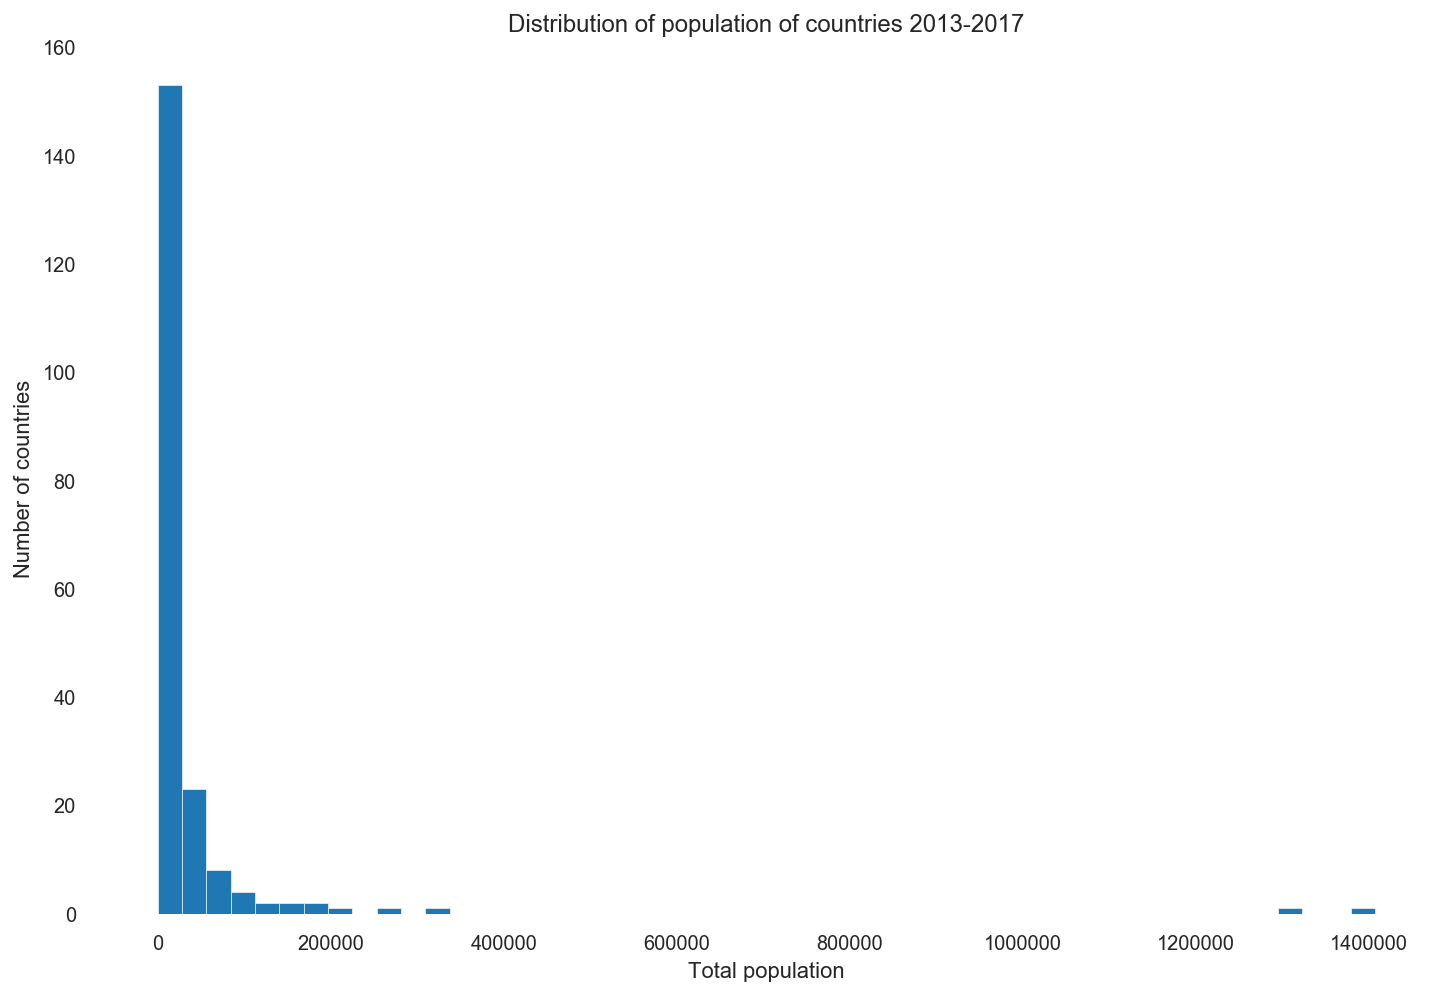

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
ax.hist(recent.total_pop.values, bins=50)
ax.set_xlabel('Total population')
ax.set_ylabel('Number of countries')
ax.set_title('Distribution of population of countries 2013-2017')

The data is definetly skewed! How to handle?
1. Log transformations
2. Data normalization

In [41]:
# modularize the code foe plotting nulls geospatially
def plot_map(df, variable, time_period=None, log=False, legend_name=None, threshold_scale=None):
    geo_path = r"../data/world.json"
    legend_name = legend_name if legend_name else "%s for %s" %(variable, time_period)
    
    if time_period:
        df = time_slice(df, time_period).reset_index()
    else:
        df = df.reset_index()
    
    if log: 
        df[variable] = df[variable].apply(np.log)
        
    map = folium.Map(location=[35, -45], zoom_start=2, width=800, height=400)
    map.choropleth(geo_data=geo_path, 
                   data=df,
                   columns=['country', variable],
                   key_on='feature.properties.name', reset=True,
                   fill_color='PuBuGn', fill_opacity=0.7, line_opacity=0.2,
                   legend_name=legend_name,
                   threshold_scale=threshold_scale)
    
    return map

In [42]:
plot_map(data, 'total_pop', '2013-2017', legend_name='Total population')

### Log transformation

In [43]:
recent[['total_pop']].apply(np.log).apply(scipy.stats.skew)

2013-2017
total_pop   -0.899063
dtype: float64

The skewness reduced from 8.5 to -0.8. IT definetly reduced. But now we have a little left skew.

In [44]:
recent[['total_pop']].apply(np.log).apply(scipy.stats.kurtosis)

2013-2017
total_pop    1.086877
dtype: float64

The kurtosis reduced from 76.92 to 1.08

In [45]:
def plot_hist(df, variable, bins=20, xlabel=None, by=None,
              ylabel=None, title=None, logx=False, ax=None):

    if not ax:
        fig, ax = plt.subplots(figsize=(12,8))
    if logx:
        if df[variable].min() <=0:
            df[variable] = df[variable] - df[variable].min() + 1
            print('Warning: data <=0 exists, data transformed by %0.2g before plotting' % (- df[variable].min() + 1))
        
        bins = np.logspace(np.log10(df[variable].min()),
                           np.log10(df[variable].max()), bins)
        ax.set_xscale("log")

    ax.hist(df[variable].dropna().values, bins=bins);
    
    if xlabel:
        ax.set_xlabel(xlabel);
    if ylabel:
        ax.set_ylabel(ylabel);
    if title:
        ax.set_title(title);
    
    return ax

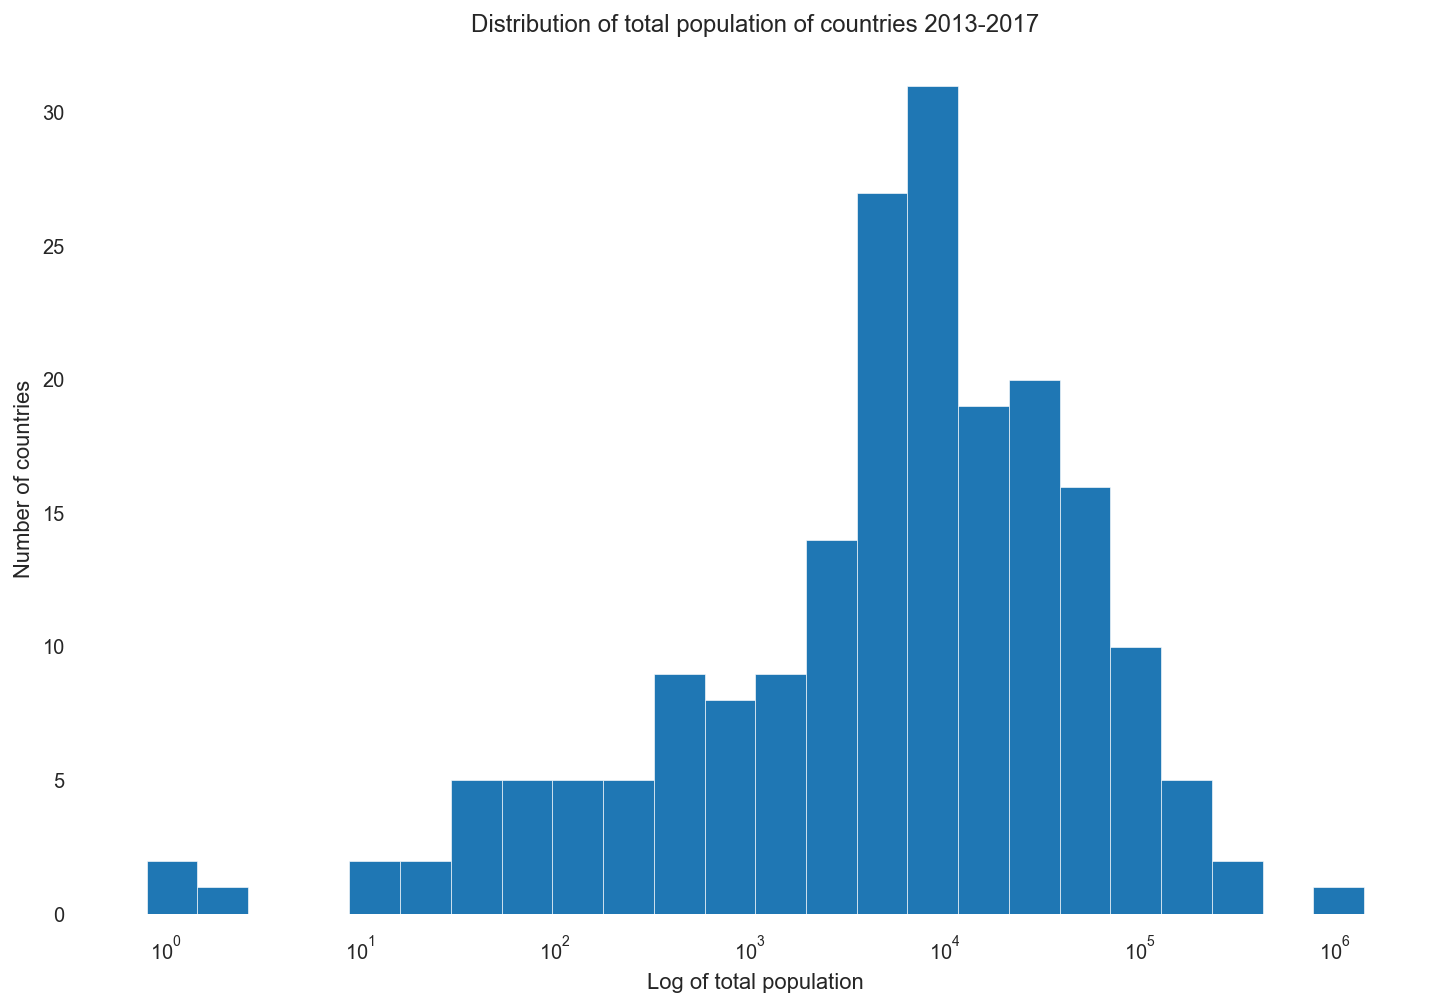

In [46]:
plot_hist(recent, 'total_pop', bins=25, logx=True, 
          xlabel='Log of total population', ylabel='Number of countries',
          title='Distribution of total population of countries 2013-2017');

In [47]:
plot_map(data, 'total_pop', '2013-2017', legend_name='Log of total population', log=True)

We can see larger countries have larger populations - that makes sense... we may hypothesize that water availability may affect countries with higher population density rather than higher absolute populations.

### Normalization

In [48]:
recent['population_density'] = recent.total_pop.divide(recent.total_area)

In [49]:
plot_map(recent, 'population_density', legend_name='Population density',threshold_scale=[0,0.3,0.8, 1.8, 78])

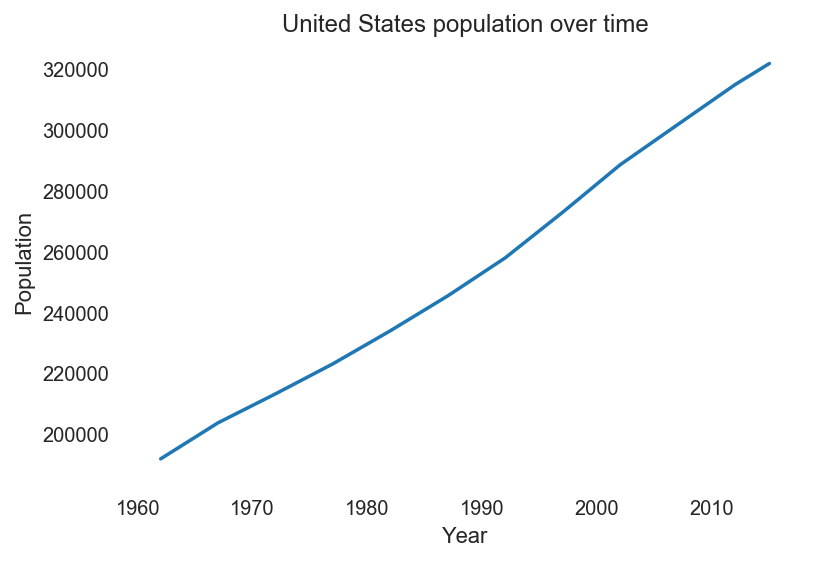

In [50]:
# USA population over time
plt.plot(time_series(data, 'United States of America', 'total_pop'));
plt.xlabel('Year');
plt.ylabel('Population');
plt.title('United States population over time');

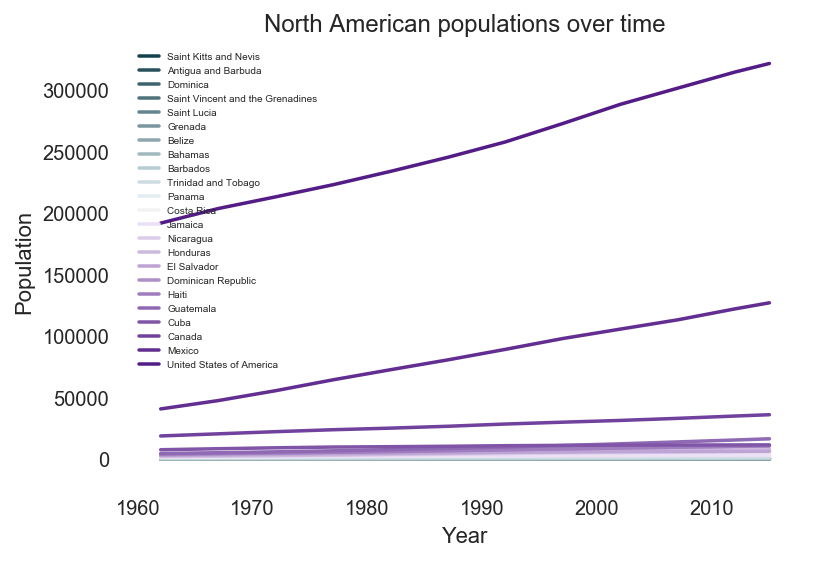

In [51]:
with sns.color_palette(sns.diverging_palette(220, 280, s=85, l=25, n=23)):
    north_america = time_slice(get_subregion(data, 'North America'), '1958-1962').sort_values('total_pop').index.tolist()
    for country in north_america:
        plt.plot(time_series(data, country, 'total_pop'), label=country);
        plt.xlabel('Year');
        plt.ylabel('Population');
        plt.title('North American populations over time');
    plt.legend(loc=2,prop={'size':5});

This graph gives no insights, other than just the fact that North America is a big country. <br>
So, normaliza again with the min, to see how much each country grows with refernce to its starting population

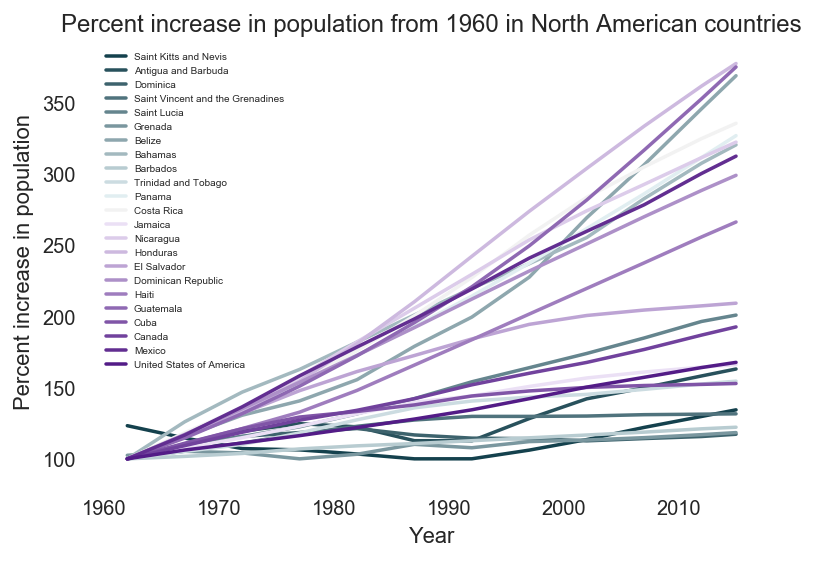

In [52]:
with sns.color_palette(sns.diverging_palette(220, 280, s=85, l=25, n=23)):
    for country in north_america:
        ts = time_series(data, country, 'total_pop')
        ts['norm_pop'] = ts.total_pop/ts.total_pop.min()*100
        plt.plot(ts['norm_pop'], label=country);
        plt.xlabel('Year');
        plt.ylabel('Percent increase in population');
        plt.title('Percent increase in population from 1960 in North American countries');
    plt.legend(loc=2,prop={'size':5});

In [53]:
north_america_pop = variable_slice(get_subregion(data, 'North America'), 'total_pop')
north_america_norm_pop = north_america_pop.div(north_america_pop.min(axis=1), axis=0)*100
north_america_norm_pop = north_america_norm_pop.loc[north_america]

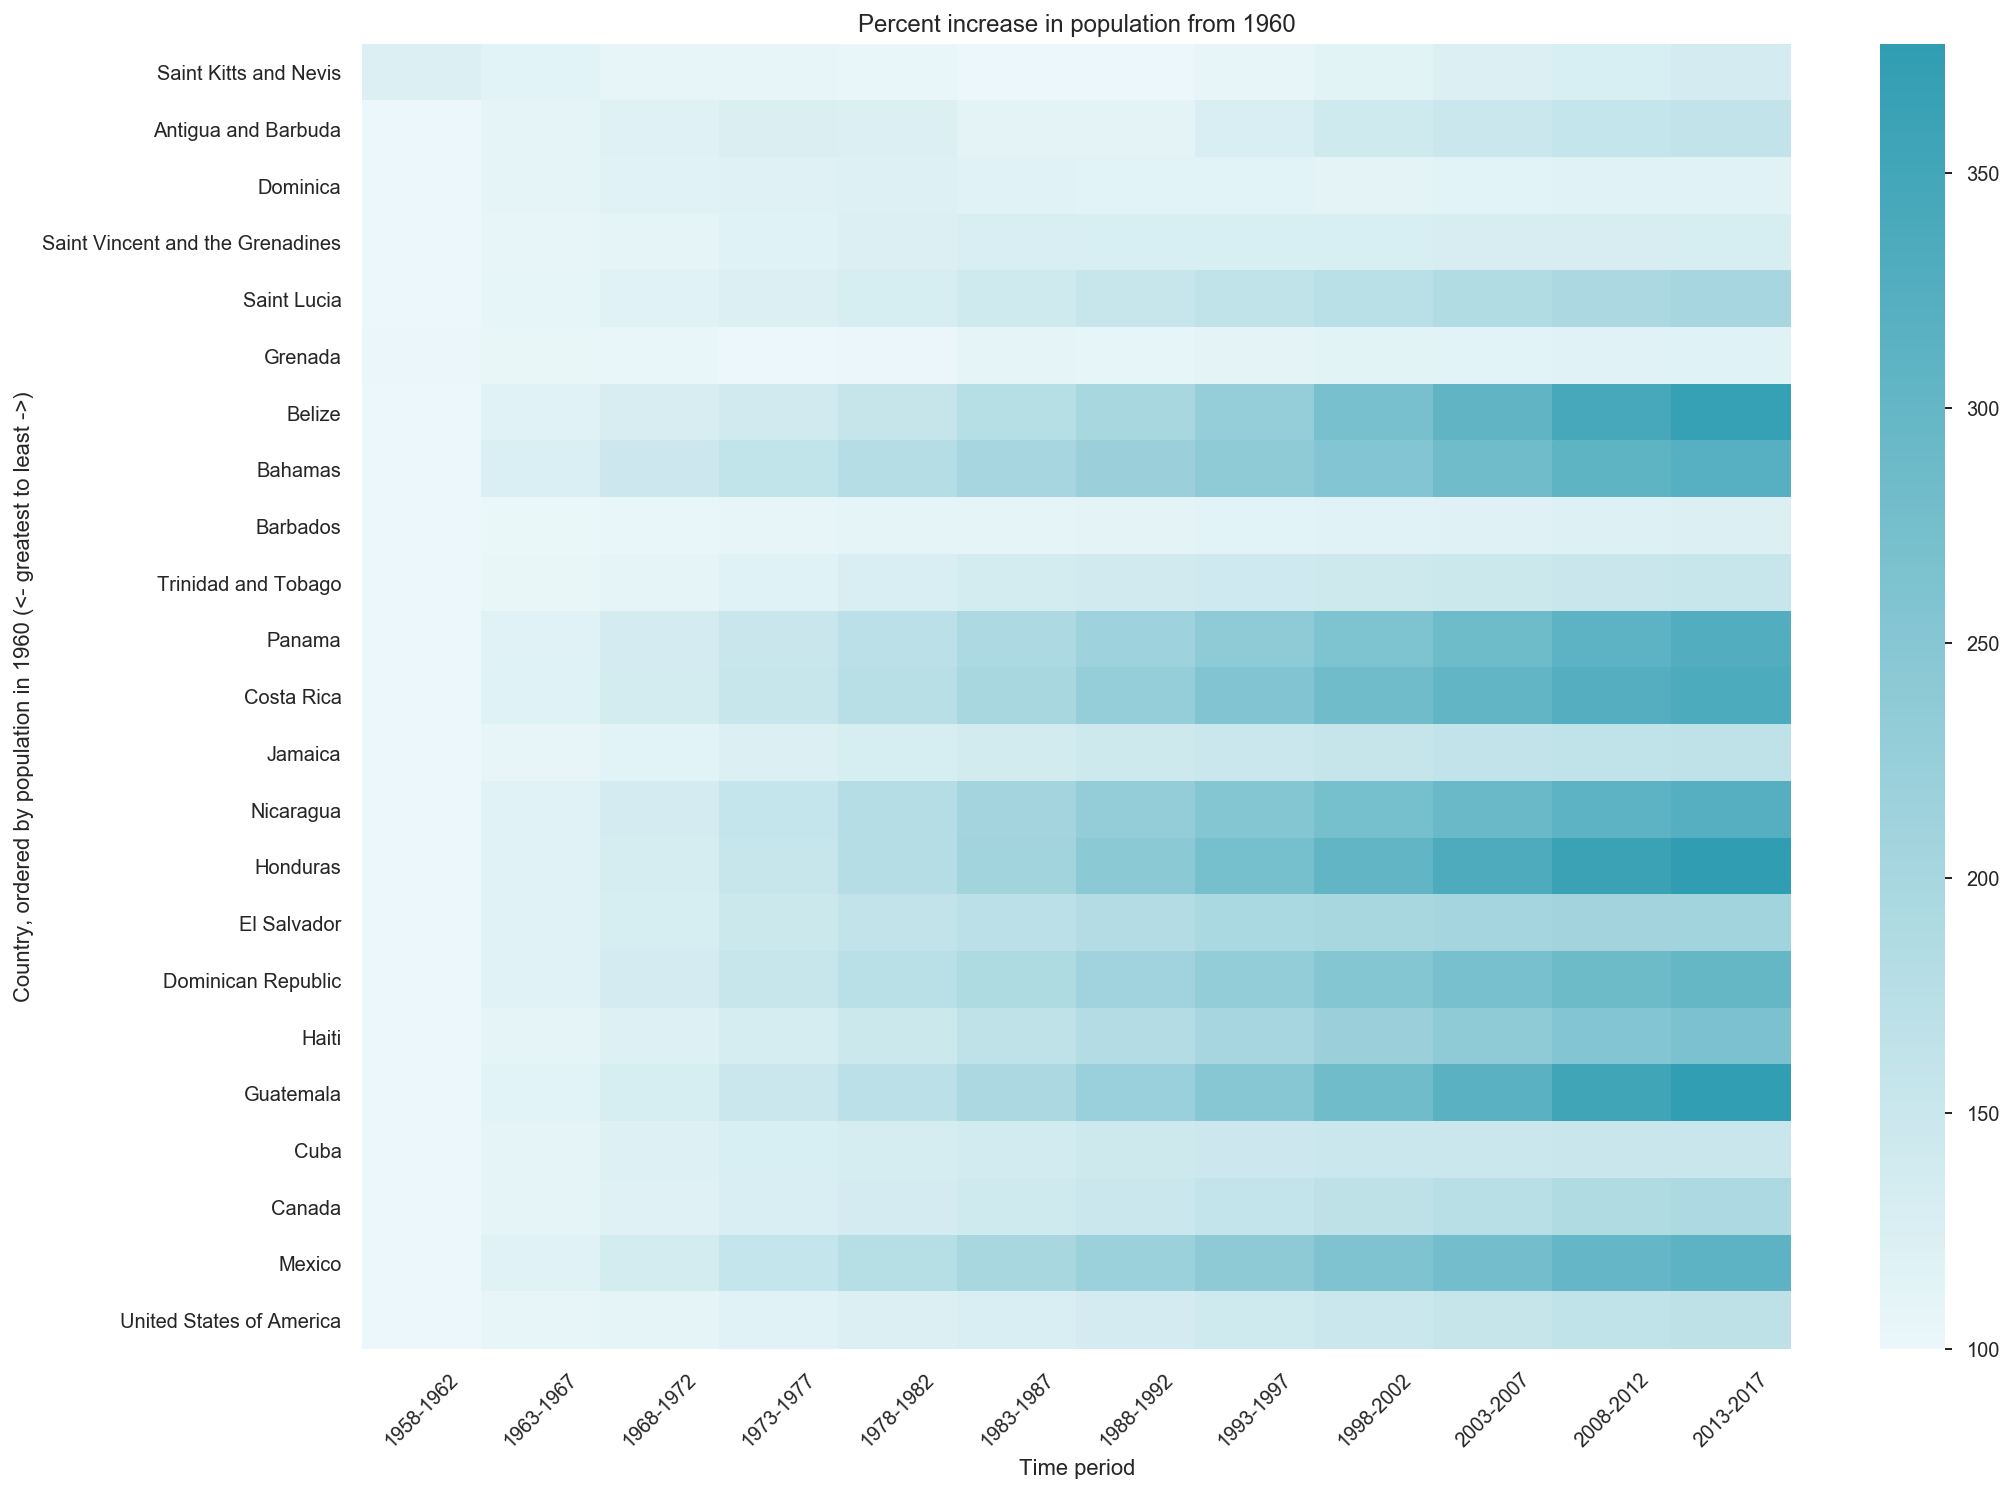

In [54]:
fig, ax = plt.subplots(figsize=(16, 12));
sns.heatmap(north_america_norm_pop, ax=ax, cmap=sns.light_palette((214, 90, 60), input="husl", as_cmap=True));
plt.xticks(rotation=45);
plt.xlabel('Time period');
plt.ylabel('Country, ordered by population in 1960 (<- greatest to least ->)');
plt.title('Percent increase in population from 1960');

### Exploring total renewable water resources

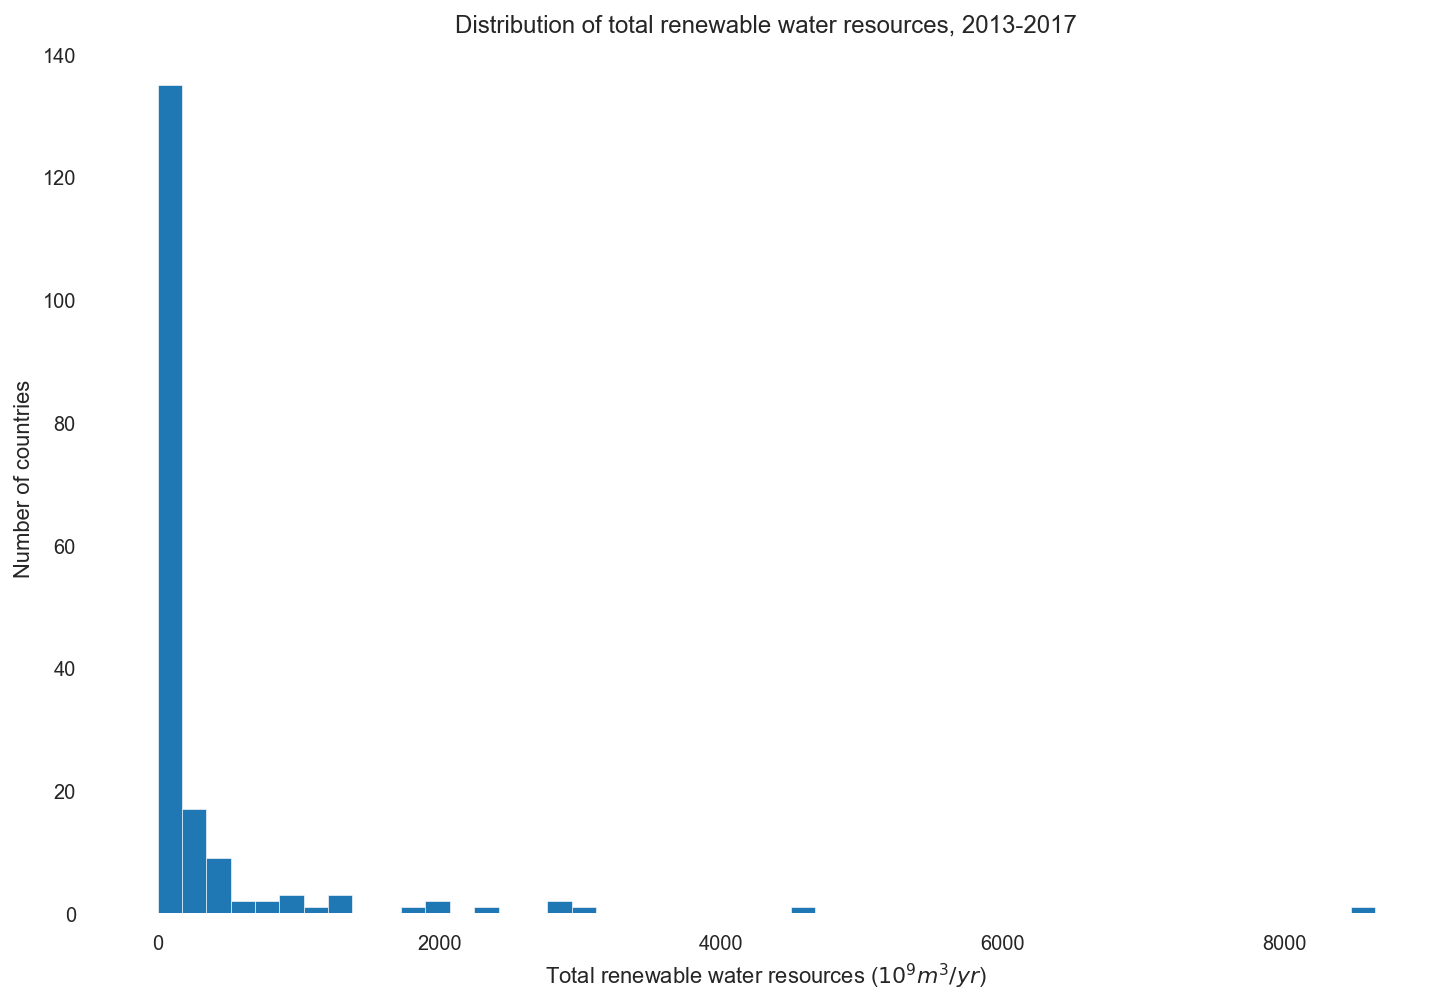

In [55]:
plot_hist(recent, 'total_renewable', bins=50, 
          xlabel='Total renewable water resources ($10^9 m^3/yr$)',
          ylabel='Number of countries', 
          title='Distribution of total renewable water resources, 2013-2017');

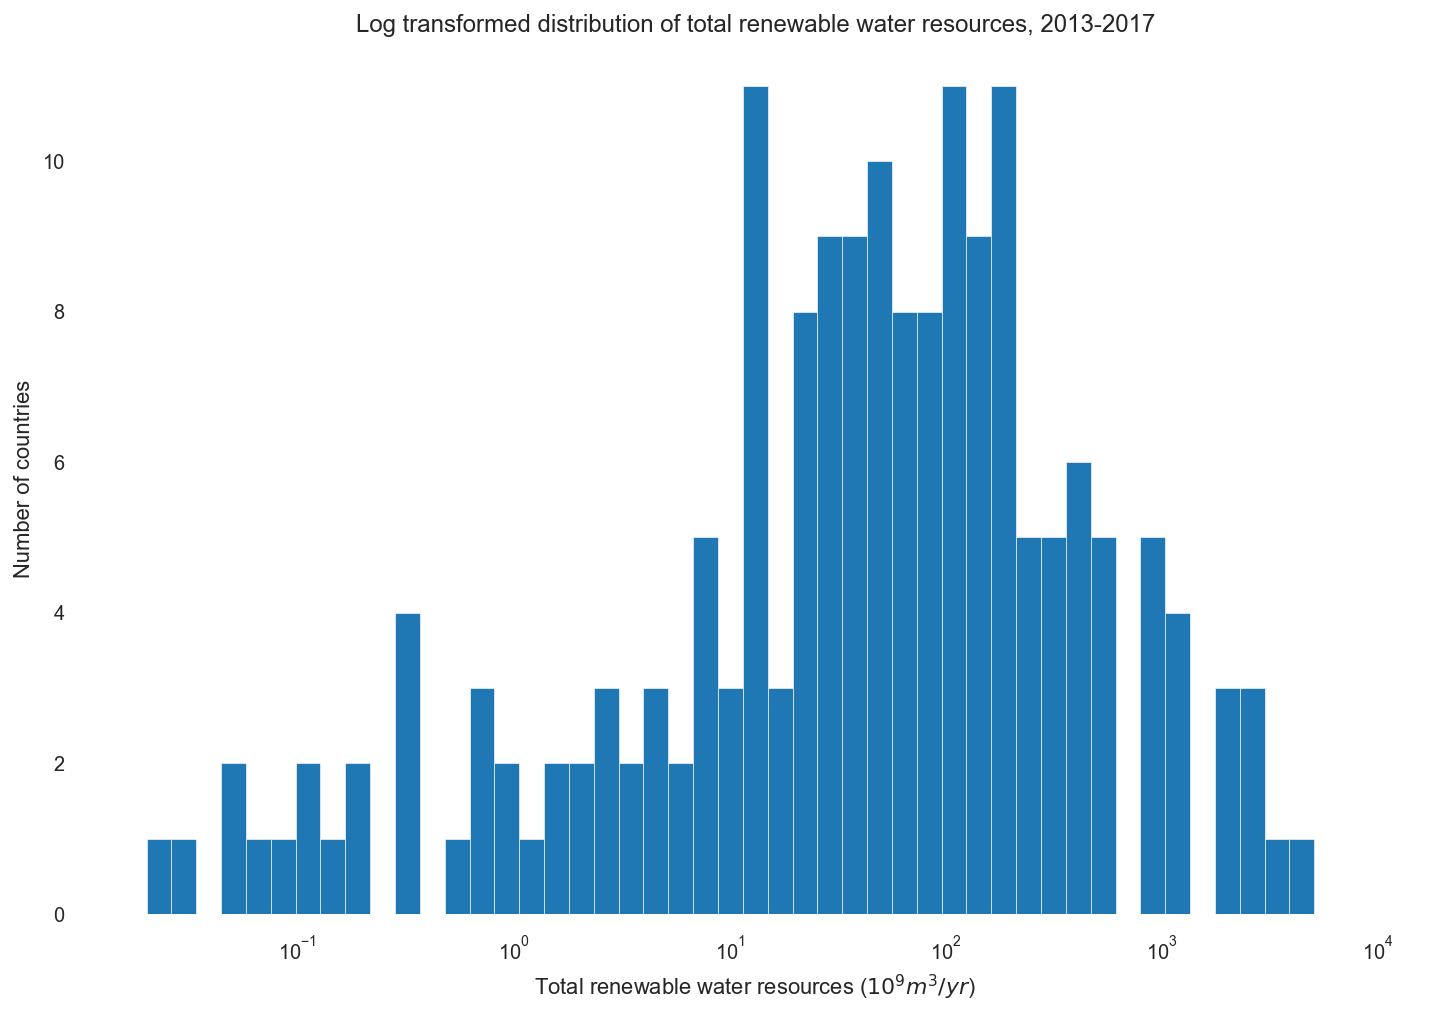

In [56]:
plot_hist(recent, 'total_renewable', bins=50, 
          xlabel='Total renewable water resources ($10^9 m^3/yr$)',
          ylabel='Number of countries', logx=True,
          title='Log transformed distribution of total renewable water resources, 2013-2017');

In [57]:
north_america_renew = variable_slice(get_subregion(data, 'North America'), 'total_renewable')

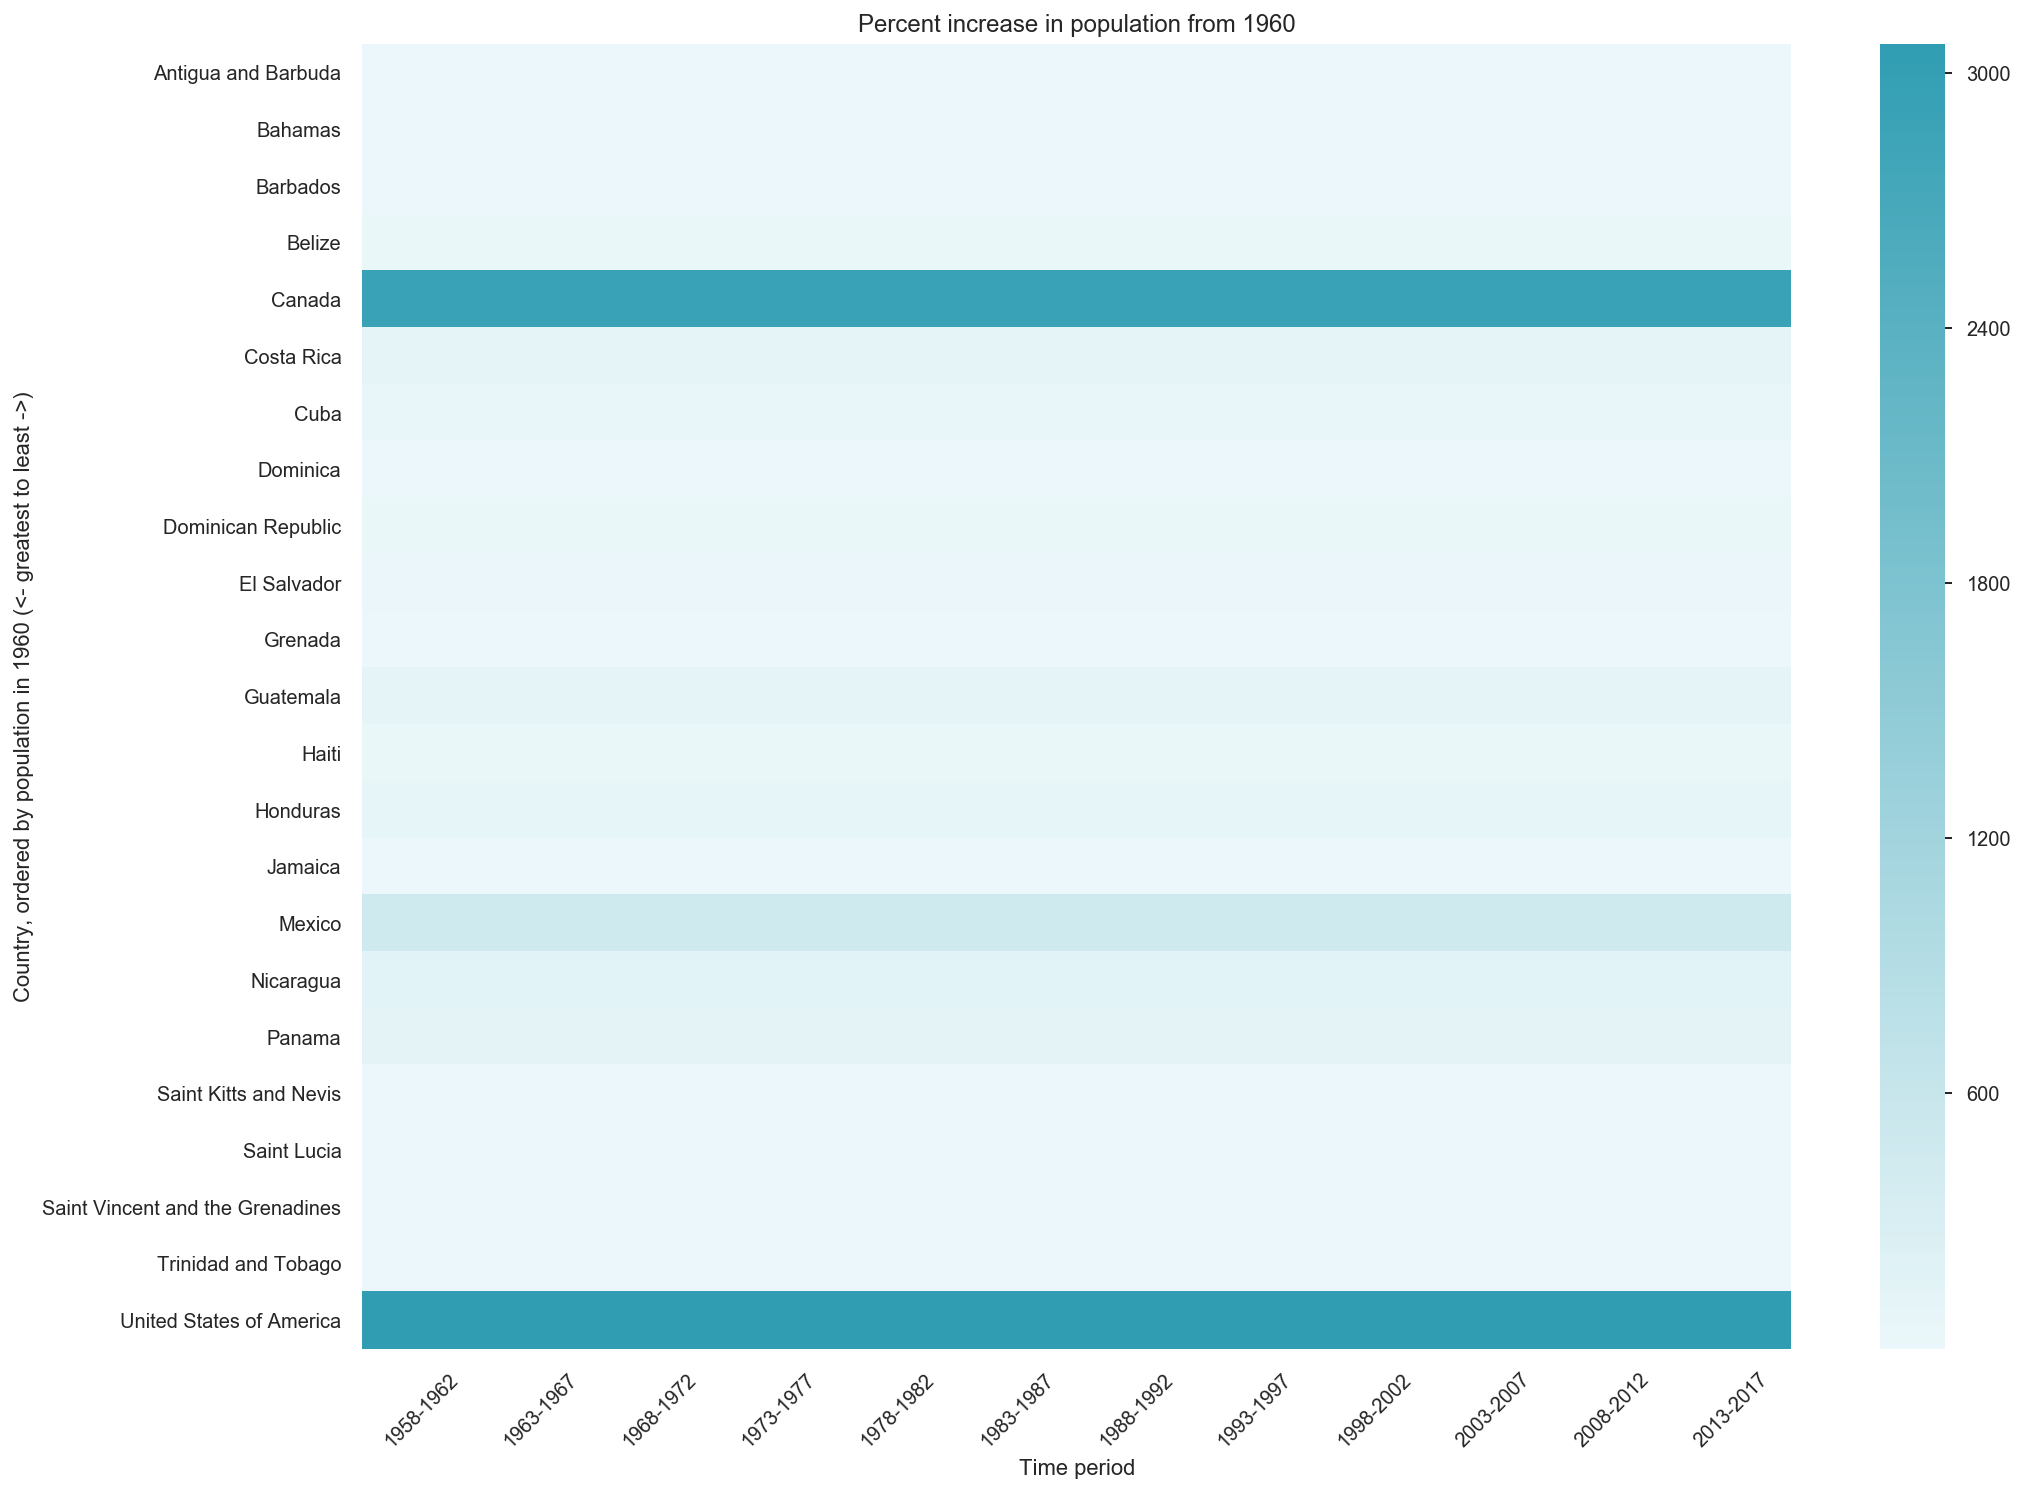

In [58]:
fig, ax = plt.subplots(figsize=(16, 12));
sns.heatmap(north_america_renew, ax=ax, cmap=sns.light_palette((214, 90, 60), input="husl", as_cmap=True));
plt.xticks(rotation=45);
plt.xlabel('Time period');
plt.ylabel('Country, ordered by population in 1960 (<- greatest to least ->)');
plt.title('Percent increase in population from 1960');

Total renewable resources doesn't seem to change over time. But, better to check

In [59]:
north_america_renew.head()

time_period          1958-1962  1963-1967  1968-1972  1973-1977  1978-1982  \
country                                                                      
Antigua and Barbuda      0.052      0.052      0.052      0.052      0.052   
Bahamas                  0.700      0.700      0.700      0.700      0.700   
Barbados                 0.080      0.080      0.080      0.080      0.080   
Belize                  21.730     21.730     21.730     21.730     21.730   
Canada                2902.000   2902.000   2902.000   2902.000   2902.000   

time_period          1983-1987  1988-1992  1993-1997  1998-2002  2003-2007  \
country                                                                      
Antigua and Barbuda      0.052      0.052      0.052      0.052      0.052   
Bahamas                  0.700      0.700      0.700      0.700      0.700   
Barbados                 0.080      0.080      0.080      0.080      0.080   
Belize                  21.730     21.730     21.730     21.730     21.730   
Canada                2902.000   2902.000   2902.000   2902.000   2902.000   

time_period          2008-2012  2013-2017  
country                                    
Antigua and Barbuda      0.052      0.052  
Bahamas                  0.700      0.700  
Barbados                 0.080      0.080  
Belize                  21.730     21.730  
Canada                2902.000   2902.000

 subtract 1958-1962 values from each period and add up the results

In [60]:
north_america_renew.sub(north_america_renew.iloc[:,0], axis=0).sum()

time_period
1958-1962    0.0
1963-1967    0.0
1968-1972    0.0
1973-1977    0.0
1978-1982    0.0
1983-1987    0.0
1988-1992    0.0
1993-1997    0.0
1998-2002    0.0
2003-2007    0.0
2008-2012    0.0
2013-2017    0.0
dtype: float64

Does this apply to the rest of the world?

In [61]:
renew = variable_slice(data, 'total_renewable')
renew.sub(renew.iloc[:,0], axis=0).sum()

time_period
1958-1962     0.0
1963-1967     0.0
1968-1972     0.0
1973-1977     0.0
1978-1982     0.0
1983-1987     0.0
1988-1992     0.0
1993-1997   -14.0
1998-2002   -14.0
2003-2007   -17.0
2008-2012   -17.0
2013-2017   -17.0
dtype: float64

NO!!!! Look at country 

In [62]:
renew.sub(renew.iloc[:,0], axis=0).sum(axis=1).sort_values().head()

country
Bhutan        -79.0
Afghanistan     0.0
Nigeria         0.0
Niue            0.0
Norway          0.0
dtype: float64

Bhutan changed

In [63]:
renew.sub(renew.iloc[:,0], axis=0).sum(axis=1).sort_values().tail(50)

country
Djibouti                            0.0
Dominican Republic                  0.0
Hungary                             0.0
Iceland                             0.0
India                               0.0
Indonesia                           0.0
Iran (Islamic Republic of)          0.0
Iraq                                0.0
Ireland                             0.0
Israel                              0.0
Italy                               0.0
Jamaica                             0.0
Japan                               0.0
Jordan                              0.0
Kazakhstan                          0.0
Kenya                               0.0
Kiribati                            0.0
Kuwait                              0.0
Kyrgyzstan                          0.0
Lao People's Democratic Republic    0.0
Latvia                              0.0
Lebanon                             0.0
Lesotho                             0.0
Honduras                            0.0
Dominica                        

### Assess the relationship between each variable and the target

Assess the relationships by
- Linearity
- Direction
- Rough size
- Strength


All our data is of continous type. Hence we need bivariate plotting for continous * continous. The below are the possible plots to consider
- Scatter plots
- Correlation matrix heatmap
- Hexibin plots
- Joint KDE(Kernel Density Estimation) plots

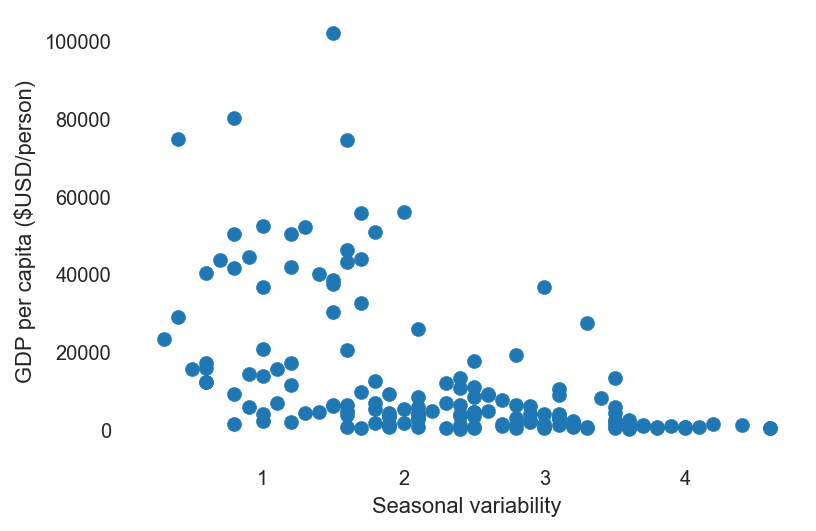

In [64]:
plt.scatter(recent.seasonal_variability, recent.gdp_per_capita)
plt.xlabel('Seasonal variability');
plt.ylabel('GDP per capita ($USD/person)');

In [65]:
def plot_scatter(df, x, y, xlabel=None, ylabel=None, title=None,
                 logx=False, logy=False, by=None, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(12, 10))

    colors = mpl.rcParams['axes.prop_cycle'].by_key()['color']
    if by:
        groups = df.groupby(by)
        for j, (name, group) in enumerate(groups):
            ax.scatter(group[x], group[y], color=colors[j], label=name)
        ax.legend()
    else:
        ax.scatter(df[x], df[y], color=colors[0])
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')

    ax.set_xlabel(xlabel if xlabel else x);
    ax.set_ylabel(ylabel if ylabel else y);
    if title:
        ax.set_title(title);
    return ax

In [66]:
svr = [recent.seasonal_variability.min(), recent.seasonal_variability.max()]
gdpr = [(recent.gdp_per_capita.min()), recent.gdp_per_capita.max()] 
gdpbins = np.logspace(*np.log10(gdpr), 25)

C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


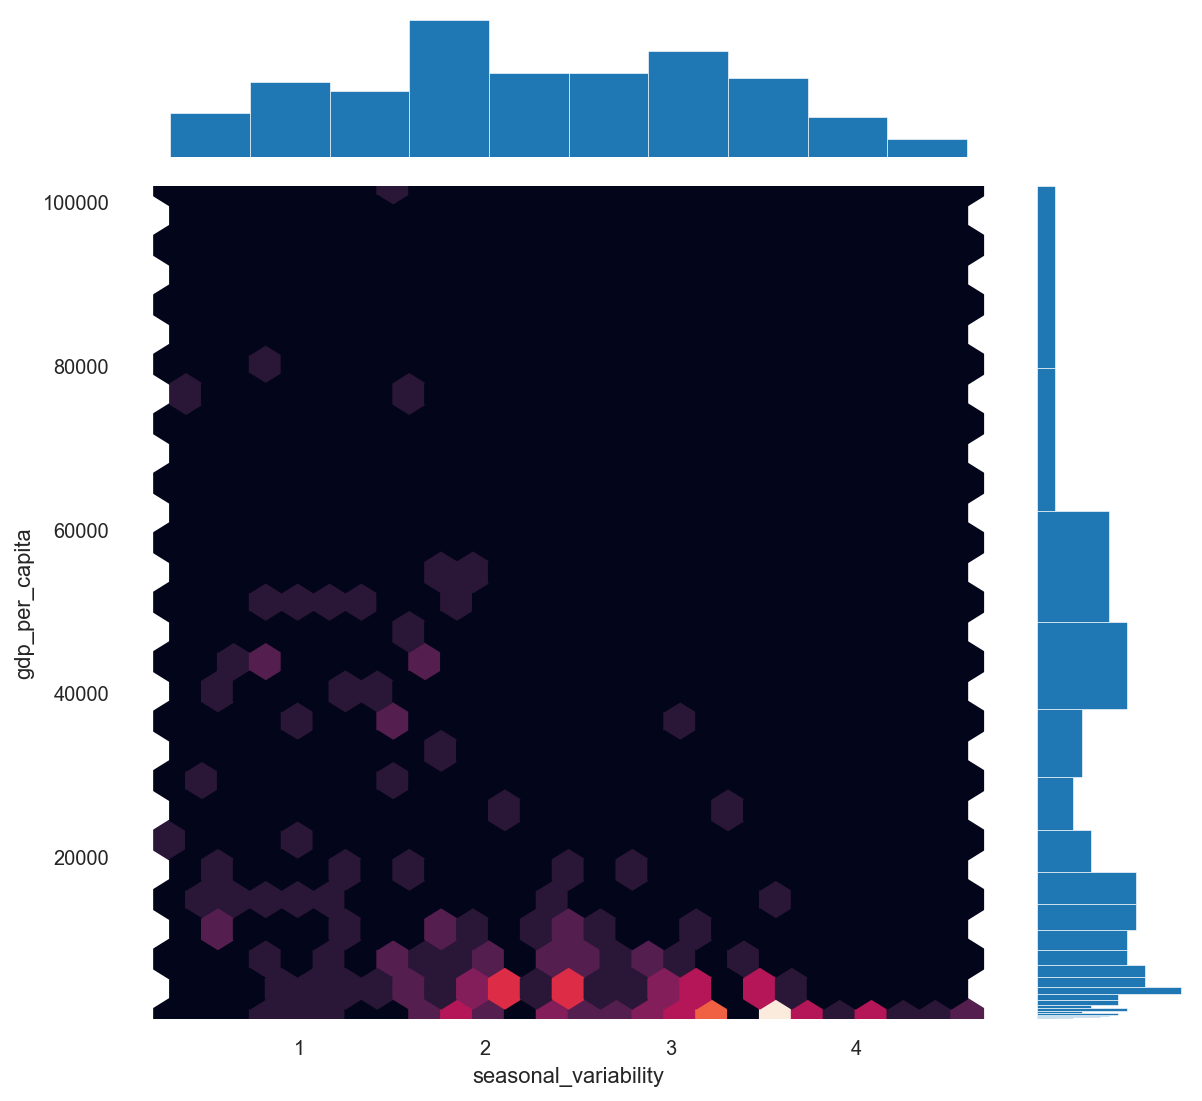

In [67]:
g =sns.JointGrid(x="seasonal_variability", y="gdp_per_capita", data=recent, ylim=gdpr)
g.ax_marg_x.hist(recent.seasonal_variability, range=svr)
g.ax_marg_y.hist(recent.gdp_per_capita, range=gdpr, bins=gdpbins, orientation="horizontal")
g.plot_joint(plt.hexbin, gridsize=25)
ax = g.ax_joint
# ax.set_yscale('log')
g.fig.set_figheight(8)
g.fig.set_figwidth(9)

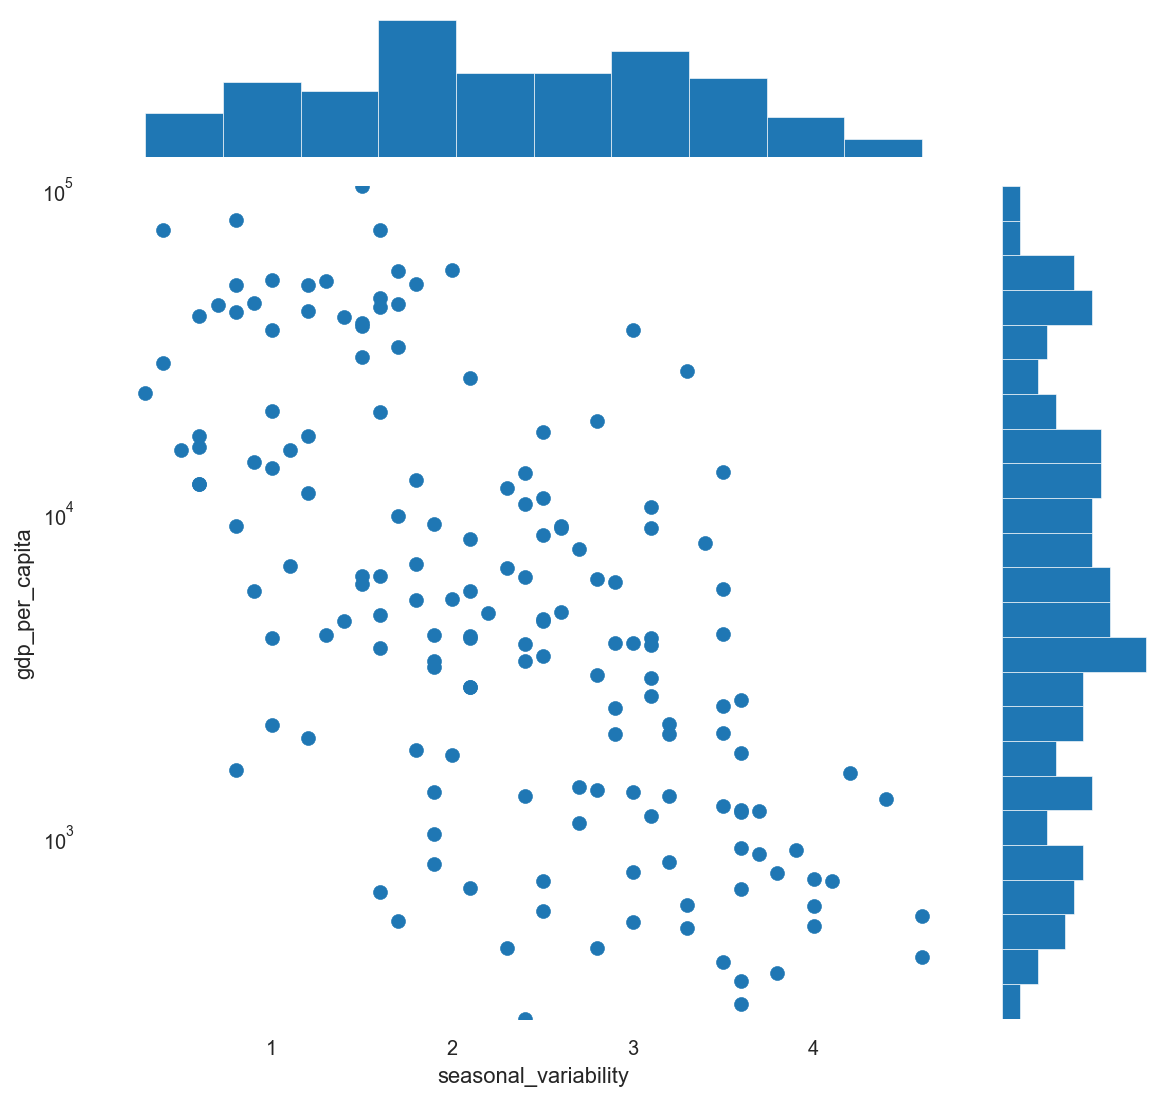

In [68]:
g =sns.JointGrid(x="seasonal_variability", y="gdp_per_capita", data=recent, ylim=gdpr)
g.ax_marg_x.hist(recent.seasonal_variability, range=svr)
g.ax_marg_y.hist(recent.gdp_per_capita, range=gdpr, bins=gdpbins, orientation="horizontal")
g.plot_joint(plt.scatter)
ax = g.ax_joint
ax.set_yscale('log')
g.fig.set_figheight(8)
g.fig.set_figwidth(9)

### Correlation
- Correlation is used to measure the strength of a __*linear*__ relationships. 

In [69]:
recent_corr = recent.corr().loc['gdp_per_capita'].drop(['gdp','gdp_per_capita'])

In [70]:
def conditional_bar(series, bar_colors=None, color_labels=None, figsize=(13,24),
                   xlabel=None, by=None, ylabel=None, title=None):
    fig, ax  = plt.subplots(figsize=figsize)
    if not bar_colors:
        bar_colors = mpl.rcParams['axes.prop_cycle'].by_key()['color'][0]
    plt.barh(range(len(series)),series.values, color=bar_colors)
    plt.xlabel('' if not xlabel else xlabel);
    plt.ylabel('' if not ylabel else ylabel)
    plt.yticks(range(len(series)), series.index.tolist())
    plt.title('' if not title else title);
    plt.ylim([-1,len(series)]);
    if color_labels:
        for col, lab in color_labels.items():
            plt.plot([], linestyle='',marker='s',c=col, label= lab);
        lines, labels = ax.get_legend_handles_labels();
        ax.legend(lines[-len(color_labels.keys()):], labels[-len(color_labels.keys()):], loc='upper right');
    plt.close()
    return fig

C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


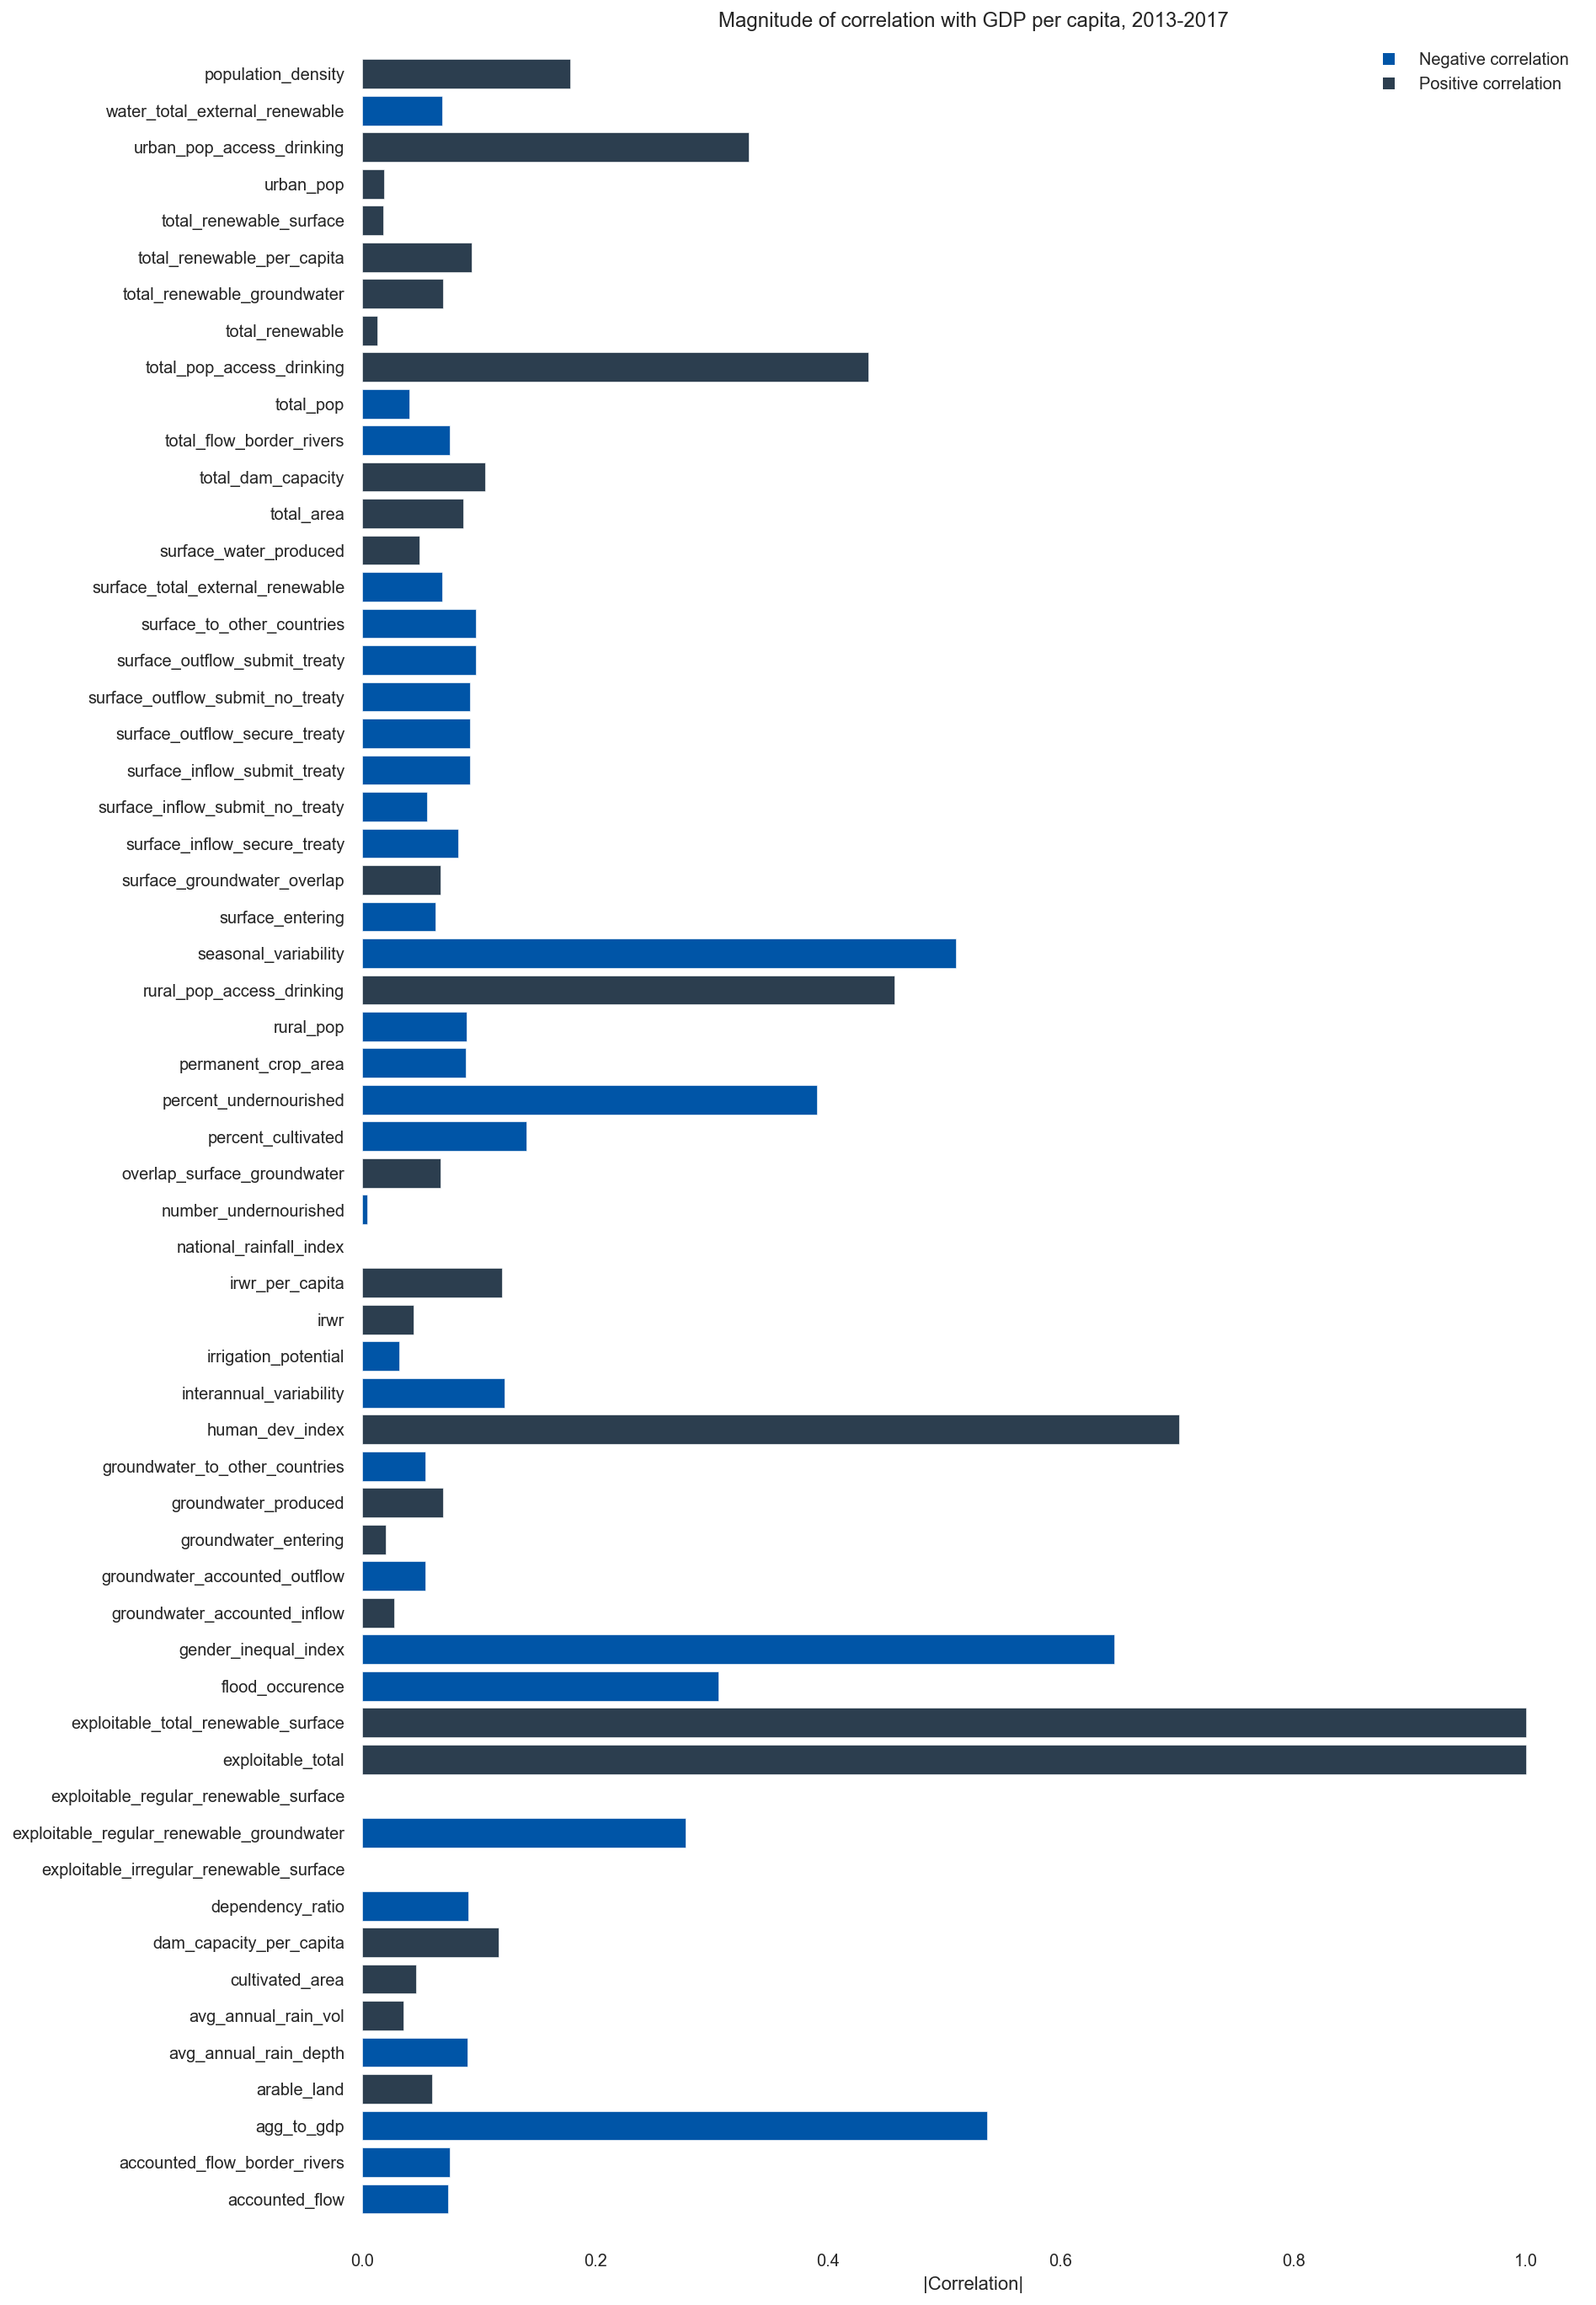

In [71]:
bar_colors = ['#0055A7' if x else '#2C3E4F' for x in list(recent_corr.values < 0)]
color_labels = {'#0055A7':'Negative correlation', '#2C3E4F':'Positive correlation'}

conditional_bar(recent_corr.apply(np.abs), bar_colors, color_labels,
               title='Magnitude of correlation with GDP per capita, 2013-2017',
               xlabel='|Correlation|')

For __*non-linear*__ relationships, we can try
- Assess the correlations between the lod transformed data. This might still have non-linearity
- Bin variables into categories and look at the distribution of other variables for each category.

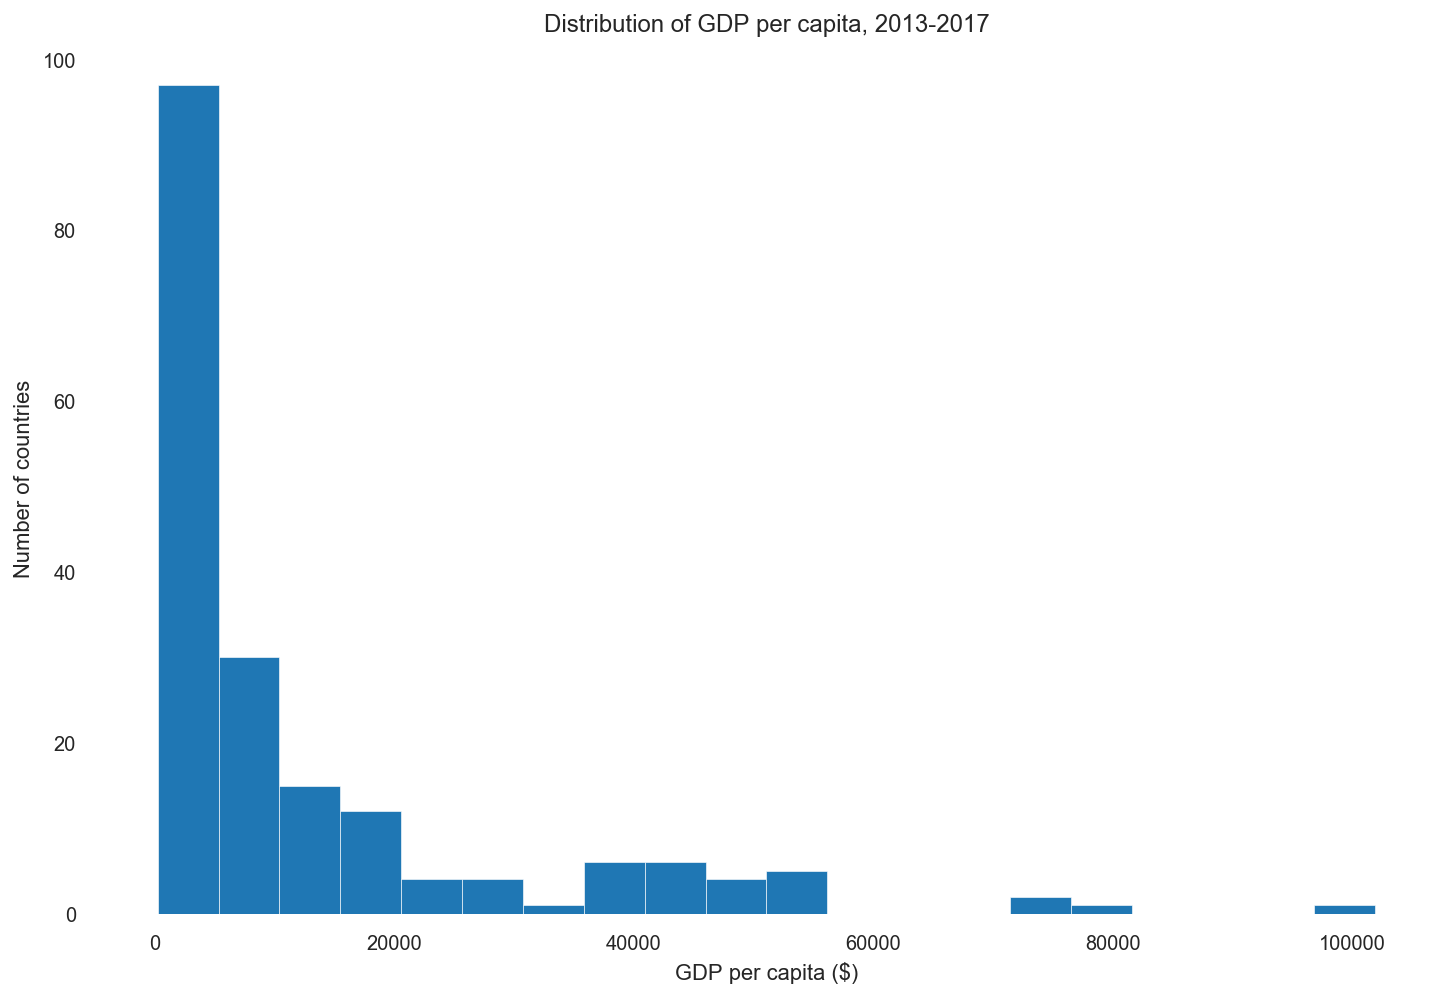

In [72]:
plot_hist(recent, 'gdp_per_capita', xlabel='GDP per capita ($)', 
         ylabel='Number of countries', 
          title='Distribution of GDP per capita, 2013-2017');

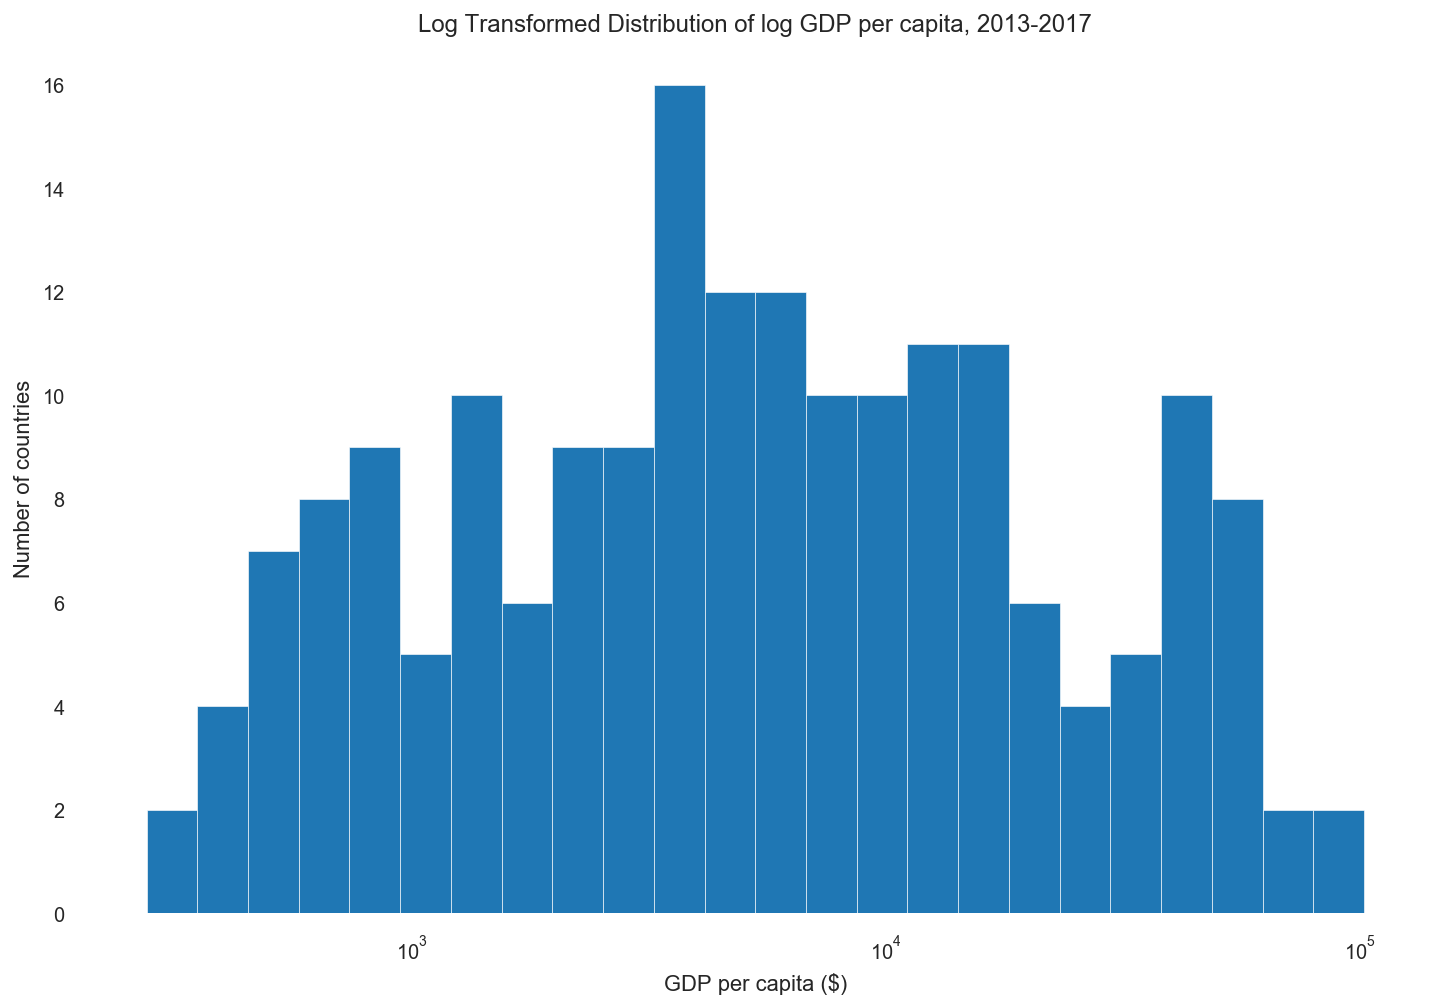

In [73]:
plot_hist(recent, 'gdp_per_capita', xlabel='GDP per capita ($)', logx=True, 
         ylabel='Number of countries', bins=25,
          title='Log Transformed Distribution of log GDP per capita, 2013-2017');

In [74]:
capita_bins = ['Very low', 'Low', 'Medium', 'High', 'Very high']
recent['gdp_bin'] = pd.qcut(recent.gdp_per_capita, 5, capita_bins)
bin_ranges = pd.qcut(recent.gdp_per_capita, 5).unique()

In [75]:
def plot_hist_bins(df, variable, bins=None, xlabel=None, by=None,
              ylabel=None, title=None, logx=False, ax=None):
    if not ax:
        fig, ax = plt.subplots(figsize=(12, 8))
    if logx:
        bins = np.logspace(np.log10(df[variable].min()),
                           np.log10(df[variable].max()), bins)
        ax.set_xscale("log")

    if by:
        if type(df[by].unique()) == pd.core.arrays.categorical.Categorical:
            cats = df[by].unique().categories.tolist()
        else:
            cats = df[by].unique().tolist()

        for cat in cats:
            to_plot = df[df[by] == cat][variable].dropna()
            ax.hist(to_plot, bins=bins);
    else:
        ax.hist(df[variable].dropna().values, bins=bins);

    if xlabel:
        ax.set_xlabel(xlabel);
    if ylabel:
        ax.set_ylabel(ylabel);
    if title:
        ax.set_title(title);

    return ax

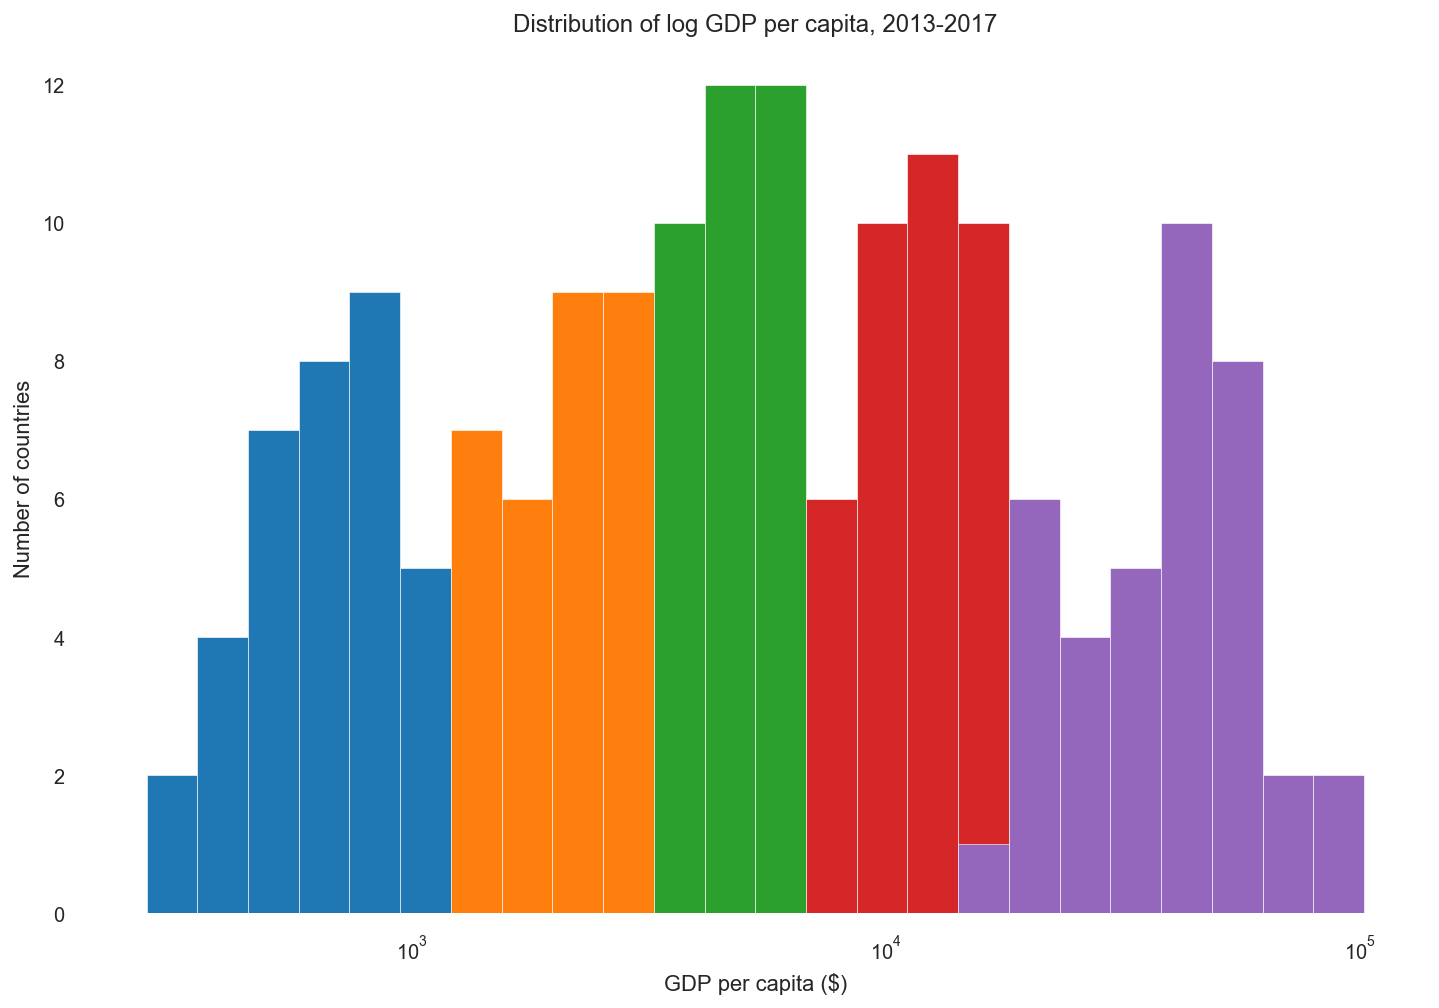

In [76]:
plot_hist_bins(recent, 'gdp_per_capita', xlabel='GDP per capita ($)', logx=True, 
         ylabel='Number of countries', bins=25, by='gdp_bin',
          title='Distribution of log GDP per capita, 2013-2017')

Now that we have a CATEGORICAL X CONTINUOUS analysis, we can look at the distribution of a few variables for each gdp group.

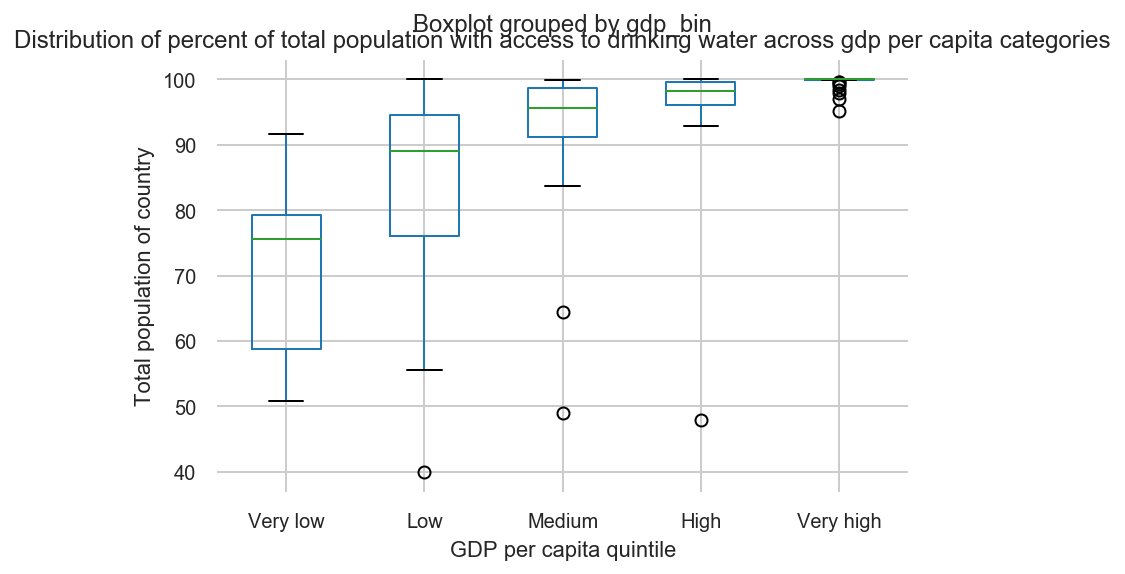

In [77]:
recent[['gdp_bin','total_pop_access_drinking']].boxplot(by='gdp_bin');
# plt.ylim([0,100000]);
plt.title('Distribution of percent of total population with access to drinking water across gdp per capita categories');
plt.xlabel('GDP per capita quintile');
plt.ylabel('Total population of country');

In [78]:
def mult_boxplots(df, variable, category, 
                  xlabel=None, ylabel=None, title=None,
                  ylim=None):
    df[[variable, category]].boxplot(by=category);
    
    if xlabel:
        plt.xlabel(xlabel);
    if ylabel:
        plt.ylabel(ylabel);
    if title:
        plt.title(title);
    if ylim:
        plt.ylim(ylim);

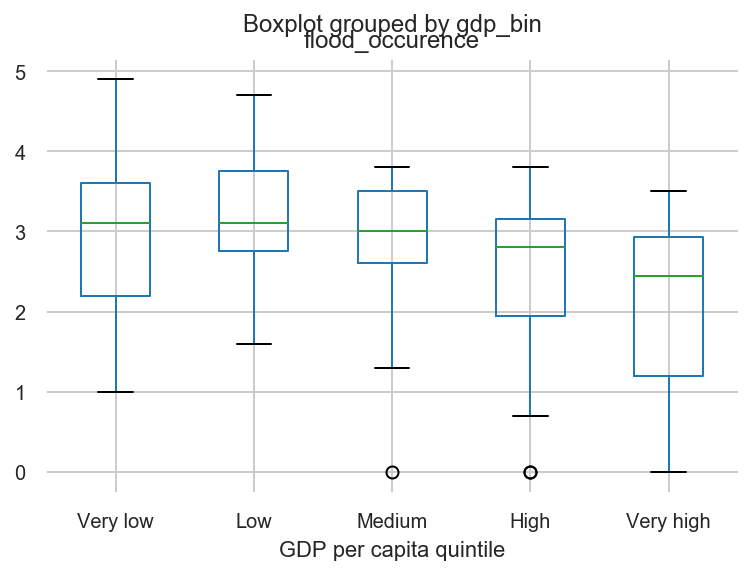

In [79]:
mult_boxplots(recent, 'flood_occurence', 'gdp_bin', xlabel='GDP per capita quintile')

Since we have lot of variables, we can rank them by f-value

In [80]:
cat = 'gdp_bin'
cat_no_bin = 'gdp_per_capita'
fps = []
for var in recent.columns.tolist():
    if var != cat and var != cat_no_bin:
        gb = recent[[var, cat]].dropna().groupby(cat)
        f, p = scipy.stats.f_oneway(*gb[var].apply(list).values.tolist())
        fps.append([var, f, p])    

fps = pd.DataFrame(fps, 
                   columns=['variable','f','p']).sort_values('f', 
                                                             ascending=False)

C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3333: RuntimeWarning: Mean of empty slice.
  offset = alldata.mean()
C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3336: RuntimeWarning: invalid value encountered in double_scalars
  sstot = _sum_of_squares(alldata) - (_square_of_sums(alldata) / bign)
C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)
C:\Users\mebandar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:3343: RuntimeWarning: invalid value encountered in double_scalars
  ssbn -= _square_of_sums(alldata) / bign


In [81]:
fps.head()

variable           f             p
22            human_dev_index  234.618336  4.952986e-70
2                  agg_to_gdp   94.414789  2.692111e-41
16       gender_inequal_index   61.450716  1.183911e-30
51  total_pop_access_drinking   39.077823  2.766087e-23
34  rural_pop_access_drinking   36.193797  6.254604e-22

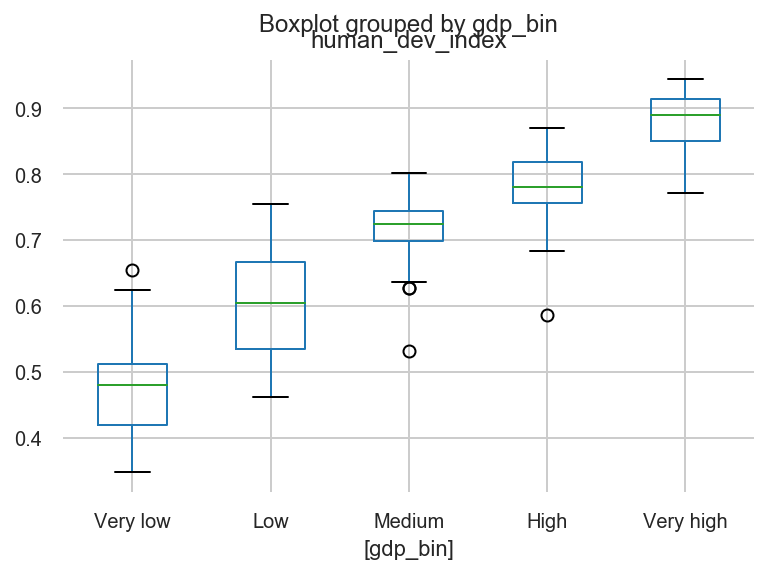

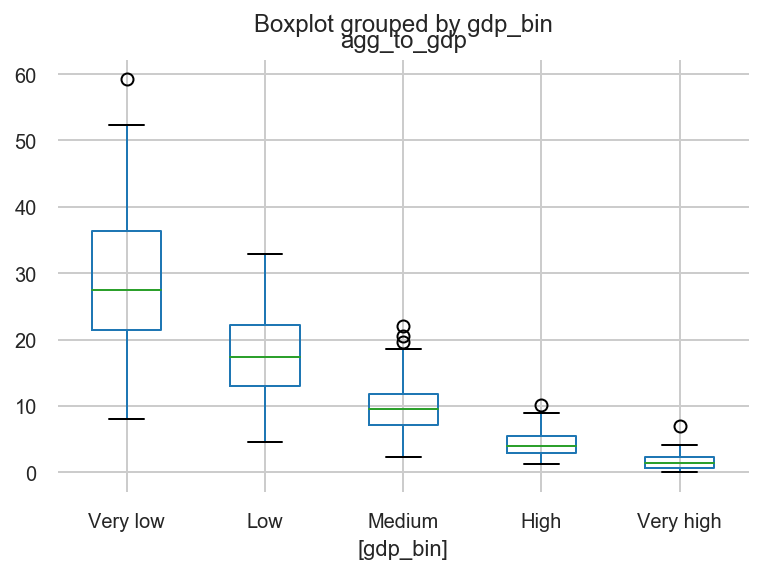

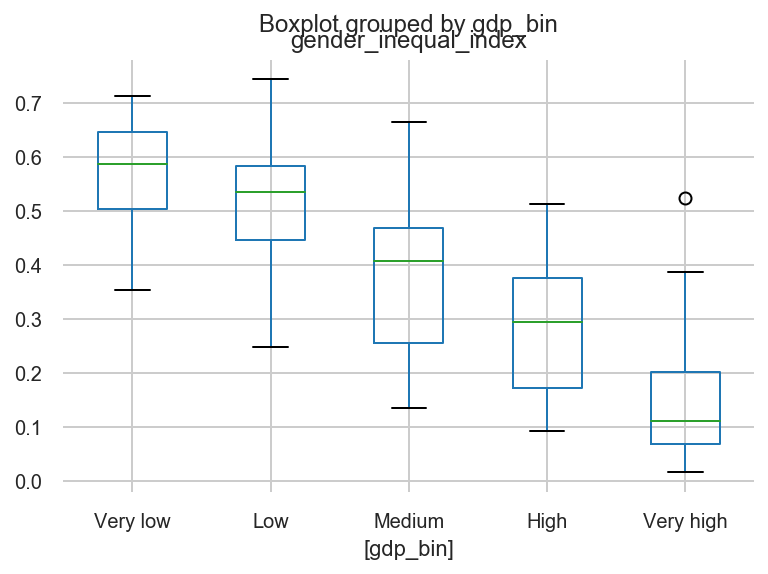

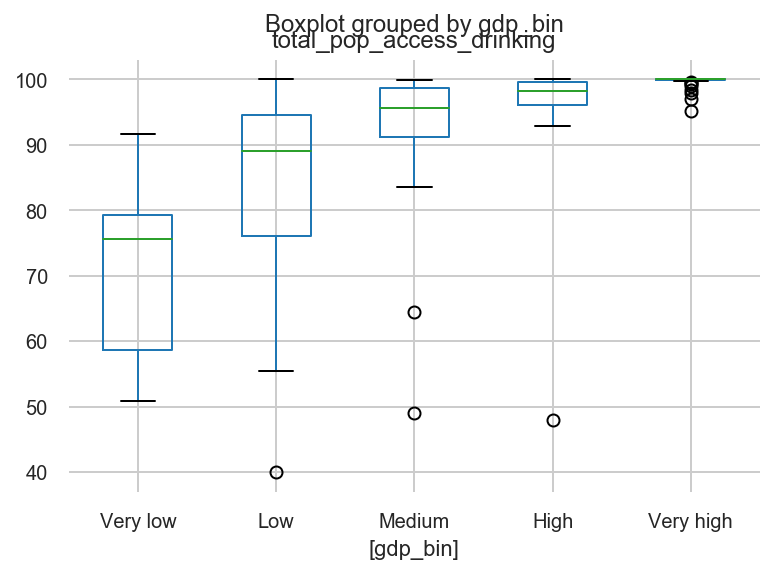

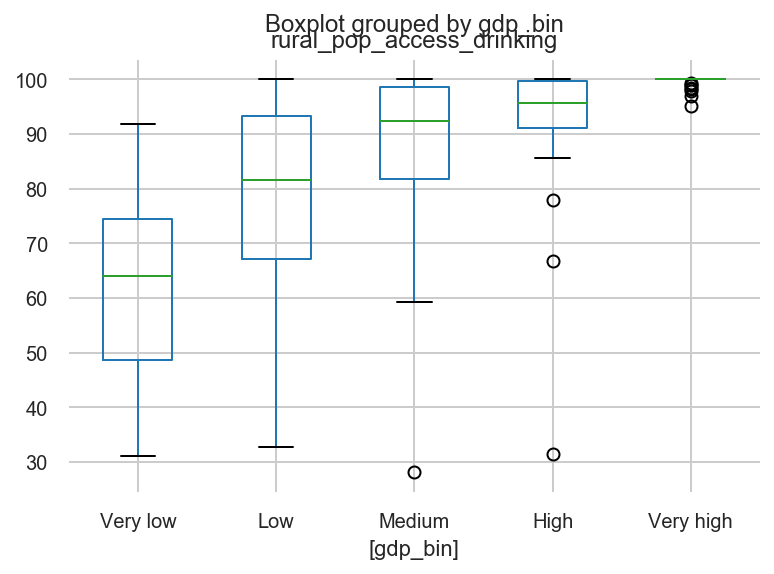

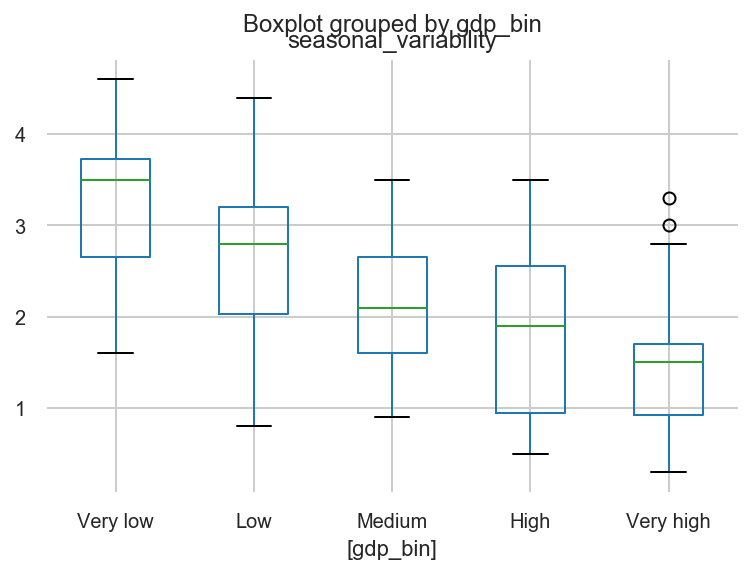

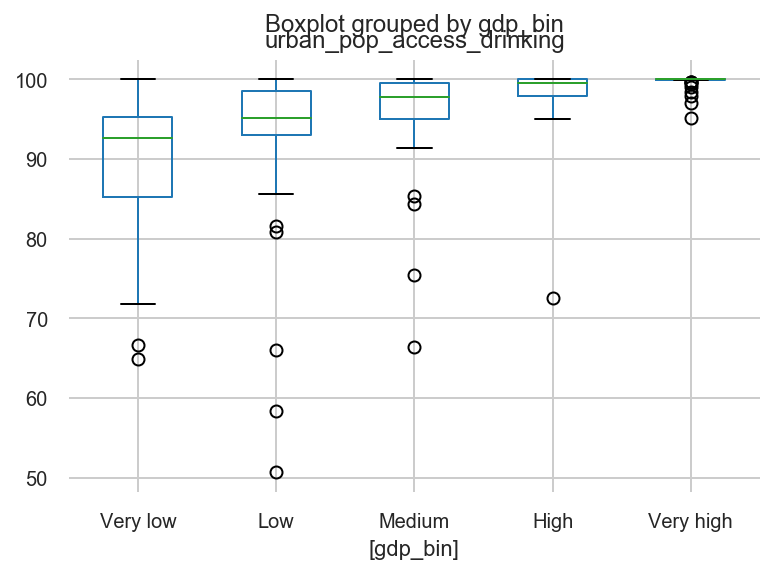

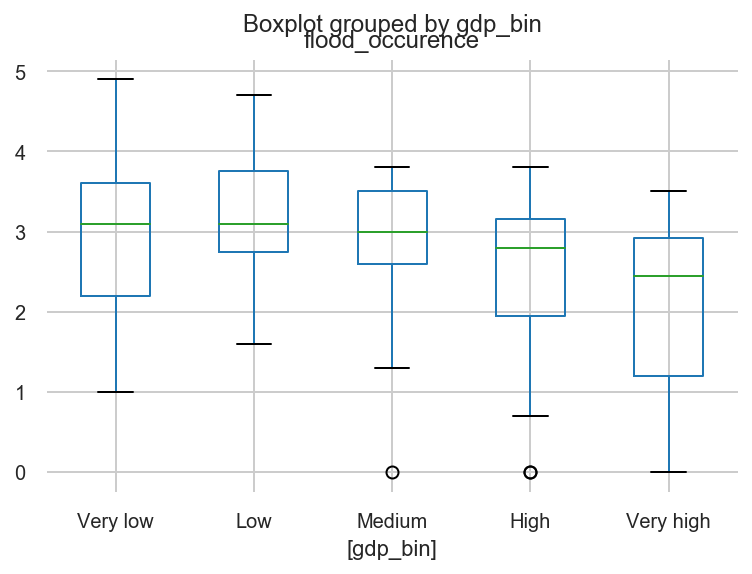

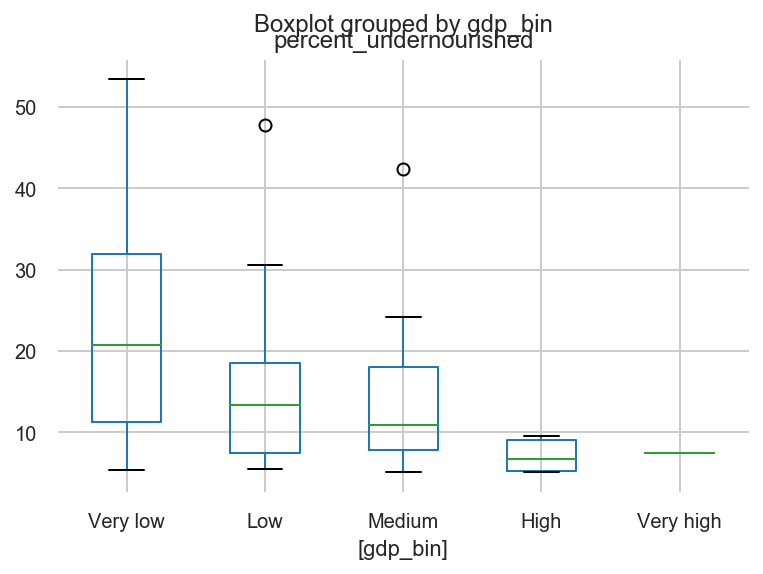

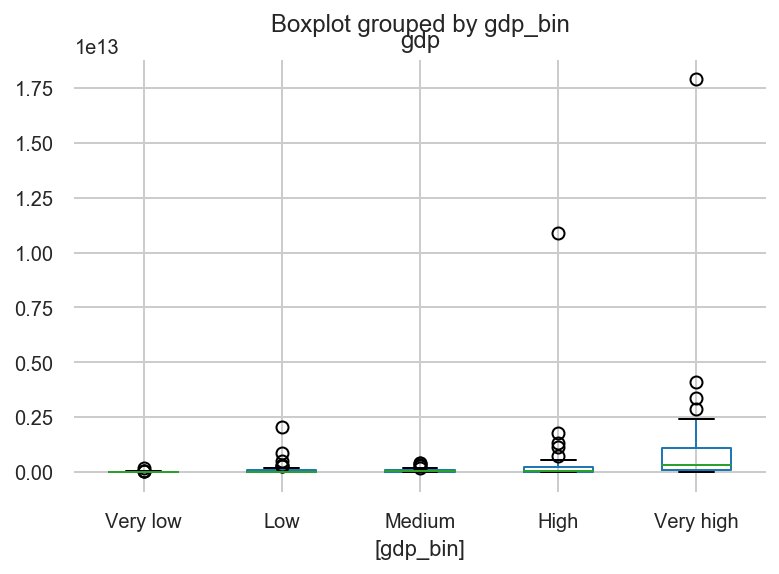

In [82]:
n = 10
for var in fps.variable.tolist()[:n]:
    mult_boxplots(recent, var, cat)

In [83]:
corr = recent.corr()

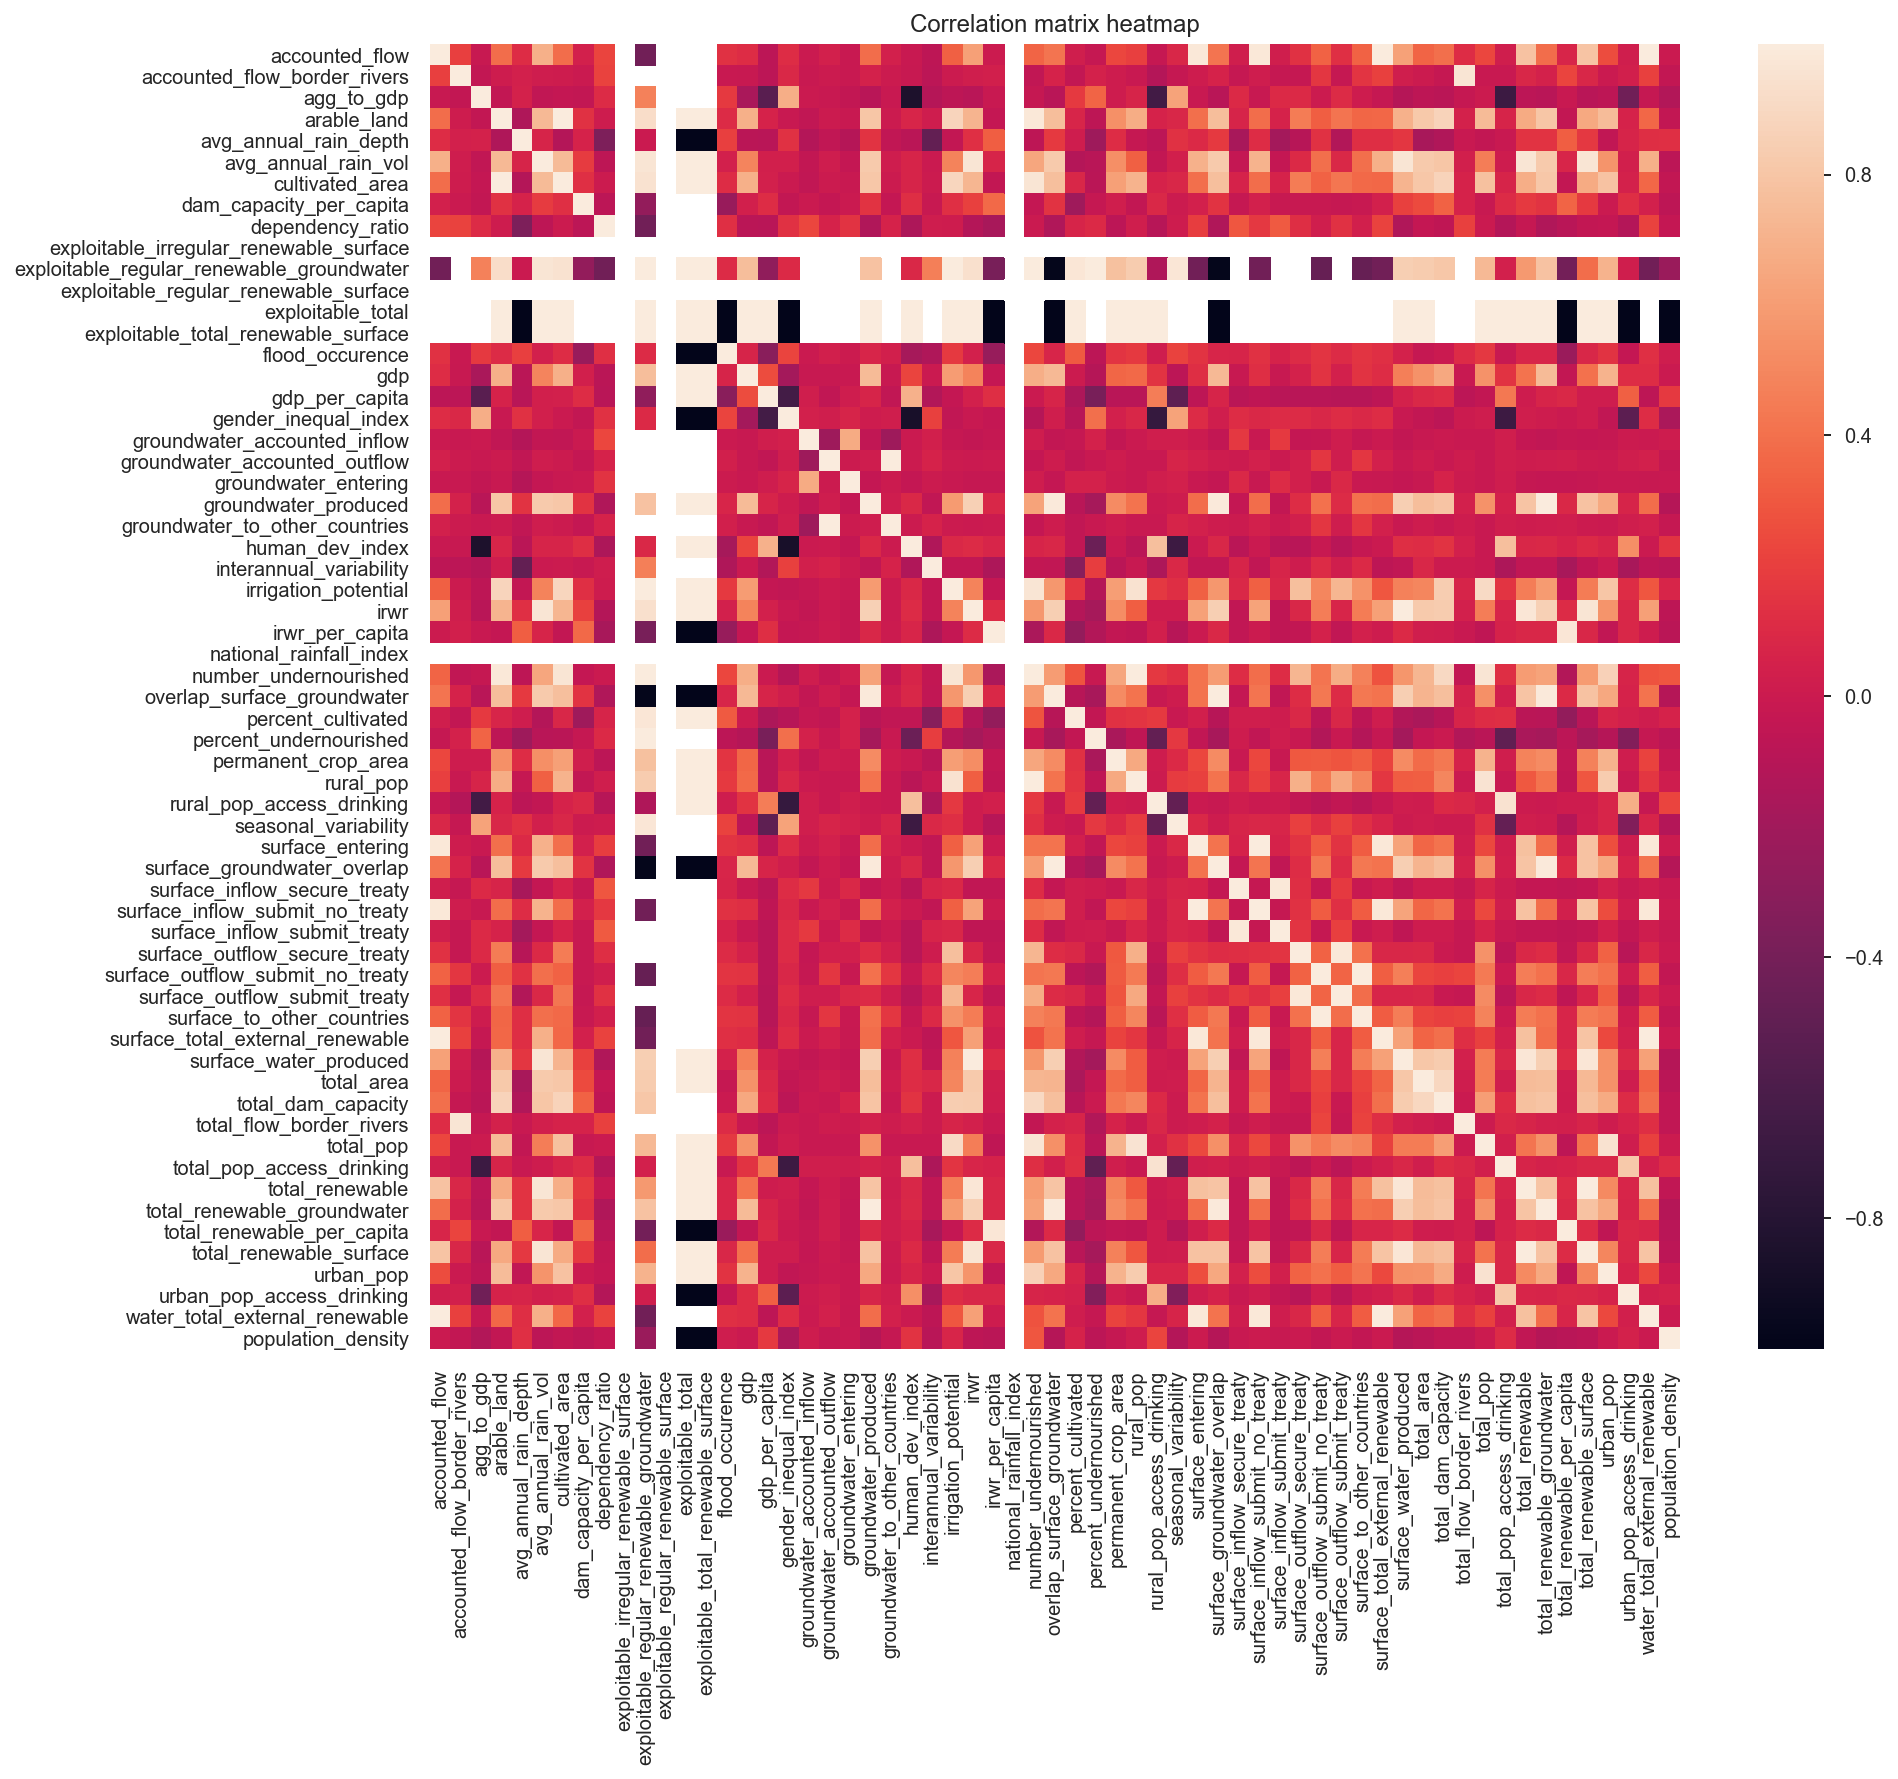

In [84]:
fig, ax = plt.subplots(figsize=(14,12));
sns.heatmap(corr, ax=ax);
plt.xlabel('');
plt.ylabel('');
plt.title('Correlation matrix heatmap');

### Conclusion: <br>
#### The GDP per capita is highly impacted by the 
- __gender inequal index__
- __seasonal variablity__

#### But we can see a noticalble affect of the below features
- __flood occurance__
- __avg annual rain depth__
- __ground water accounted inflow__
- __ground water to other countries__
- __percent cultivated__
- __percent under nourished__
- __surface ground water overlap__
- __total dam capacity__

### Hence we cannot ignore the affect of water availability and use on the GDP per capita